## Pricing Exotic Options with Monte Carlo Scheme
***

## Content

### [Introduction](#Introduction2)
- [Option Pricing](#Option_Pricing)
- [Exotic Options](#Exotic_Options)
- [Monte Carlo Scheme](#Monte_Carlo_Scheme)

### [Sample Implementation](#Sample_Implementation)
- [Preliminaries](#Preliminaries)
- [Option Pricing Algorithm](#Option_Pricing_Algorithm)
- [Payoff Functions of Exotics](#Payoff_Functions_of_Exotics)
- [Initial Pricing Example](#Initial_Pricing_Example)

### [Effects on the Option Price](#Effects_on_the_Option_Price)
- [Varying Strike $E$](#Varying_Strike)
- [Varying Volatility $\sigma$](#Varying_Volatility)
- [Varying Interest/Growth Rate $r$](#Varying_Interest_Growth_Rate)
- [Varying Time to Expiry $(T - t)$](#Varying_Time_to_Expiry)
- [Varying Upper Boundary $B_{up}$](#Varying_Upper_Boundary)
- [Varying Lower Boundary $B_{low}$](#Varying_Lower_Boundary)
- [Varing Average Window Size $w_{size}$](#Varying_Window_Size)
- [Varing Window Starting Point $w_{start}$](#Varying_Window_Start)
- [Varying Number of Realisations $N$](#Varying_Number_of_Realisations)

### [Further Discussions](#Further_Discussions)
- [Error of Monte Carlo Scheme](#Error_of_Monte_Carlo_Scheme)
- [Time-stepping Algorithm for Supershare Option](#Time-stepping_Algorithm_for_Supershare_Option)
- [Monte Carlo Pricing with Exact Solution](#Monte_Carlo_Pricing_with_Exact_Solution)
- [Closed-form Solution](#Closed-form_Solutions)

### [Conclusion](#Conclusion2)
- [Monte Carlo Methods](#Monte_Carlo_Methods)
- [Asian Options](#Asian_Options)
- [Supershare Option](#Supershare_Option)

### [References](#References2)

***
***
***

<a id='Introduction2'></a>

## Introduction
In this report, we would first use the Euler-Maruyama scheme to price some exotic options with a given set of parameters. Then vary the parameters to see their effects on the option price. As an extension, we also explored the time-stepping algorithm, GBM algorithm, the error of Monte Carlo methods, and the closed-form solution of supershare option.
***

<a id='Option_Pricing'></a>

### Option Pricing
Under a risk-neutral random walk for the underlying $S$, i.e. 
<br>
$$
\frac{dS}{S} = rdt + \sigma dX^Q ,
$$
<br>
where $r$ is the risk-neutral growth rate/drift. 
<br>
<br>
The fair value of an option can be expressed by the present value of the expected payoff of the contract, i.e.
<br>
<br>
$$
\textrm{option value} = e^{-r(T-t)}E^Q[\textrm{payoff}(S)] ,
$$
<br>
where the expectation is evaluated with respect to the risk-neutral random walk.
***

<a id='Exotic_Options'></a>

### Exotic Options (Asian Options and Super Share Option)
The options to be priced in this report and their characteristics/payoffs at expiry $T$ are as follows:

#### Asian Options
Asian option is an option type with payoff depending on some average of the underlying asset over a certain time period. It gained popularity as Asian option offers an average which is less volatilte than a one time point measure (as in European and American options). This could prevent the risk of market manipulation before expiry, and is particular helpful when trading assets with thin liqudility. Below we consider these main variations of Asian options (see E. G. Haug, *“The Complete Guide to Option Pricing Formulas”* p.182-202):

1. Asian Fixed Strike Call Option (Arithmetic)
> $\textrm{Payoff} = \textrm{max}(A-E,0)$,  
>
> where $A = \frac{1}{N}\sum \limits _{k=1} ^{N} S({t_i})$ is the discrete arithmetic average of underlying/stock price sampled at each time point,  
>
> and $E$ is the strike price of the contract (fixed strike)  
>   
> For simplicity, we default the window size $w_{size} = N$ (all discrete time points), starting from $w_{start} = 1$
2. Asian Fixed Strike Put Option (Arithmetic)
> $\textrm{Payoff} = \textrm{max}(E - A,0)$
>
> where $A = \frac{1}{N}\sum \limits _{k=1} ^{N} S({t_i})$ is the discrete arithmetic average of underlying/stock price sampled at each time point,  
>
> and $E$ is the strike price of the contract (fixed strike)  
>   
> For simplicity, we default the window size $w_{size} = N$ (all discrete time points), starting from $w_{start} = 1$
3. Asian Floating Strike Call Option (Arithmetic)
> $\textrm{Payoff} = \textrm{max}(S_T - A,0)$,  
>
> where $A = \frac{1}{N}\sum \limits _{k=1} ^{N} S({t_i})$ is the discrete arithmetic average of underlying/stock price sampled at each time point (floating strike),  
>
> and $S_T$ is the stock price at time $T$  
>   
> For simplicity, we default the window size $w_{size} = N$ (all discrete time points), starting from $w_{start} = 1$
4. Asian Floating Strike Put Option (Arithmetic)
> $\textrm{Payoff} = \textrm{max}(A - S_T,0)$
>
> where $A = \frac{1}{N}\sum \limits _{k=1} ^{N} S({t_i})$ is the discrete arithmetic average of underlying/stock price sampled at each time point (floating strike),  
>
> and $S_T$ is the stock price at time $T$  
>   
> For simplicity, we default the window size $w_{size} = N$ (all discrete time points), starting from $w_{start} = 1$
5. Asian Fixed Strike Call Option (Geometric)
> $\textrm{Payoff} = \textrm{max}(A-E,0)$,  
>
> where $A = e^{\frac{1}{N}\sum \limits _{k=1} ^{N} lnS({t_i})}$ is the discrete geometic average of underlying/stock price sampled at each time point,  
>
> and $E$ is the strike price of the contract (fixed strike)  
>   
> For simplicity, we default the window size $w_{size} = N$ (all discrete time points), starting from $w_{start} = 1$
6. Asian Fixed Strike Put Option (Geometric)
> $\textrm{Payoff} = \textrm{max}(E - A,0)$
>
> where $A = e^{\frac{1}{N}\sum \limits _{k=1} ^{N} lnS({t_i})}$ is the discrete geometic average of underlying/stock price sampled at each time point,  
>
> and $E$ is the strike price of the contract (fixed strike)  
>   
> For simplicity, we default the window size $w_{size} = N$ (all discrete time points), starting from $w_{start} = 1$
7. Asian Floating Strike Call Option (Geometric)
> $\textrm{Payoff} = \textrm{max}(S_T - A,0)$,  
>
> where $A = e^{\frac{1}{N}\sum \limits _{k=1} ^{N} lnS({t_i})}$ is the discrete geometic average of underlying/stock price sampled at each time point,  
>
> and $S_T$ is the stock price at time $T$  
>   
> For simplicity, we default the window size $w_{size} = N$ (all discrete time points), starting from $w_{start} = 1$
8. Asian Floating Strike Put Option (Geometric)
> $\textrm{Payoff} = \textrm{max}(A - S_T,0)$
>
> where $A = e^{\frac{1}{N}\sum \limits _{k=1} ^{N} lnS({t_i})}$ is the discrete geometic average of underlying/stock price sampled at each time point,  
>
> and $S_T$ is the stock price at time $T$  
>   
> For simplicity, we default the window size $w_{size} = N$ (all discrete time points), starting from $w_{start} = 1$  

#### Supershare Option
Supershare option is originally introduced by Hakansson in 1976. It is used to construct superfunds, (e.g. SuperUnits and  SuperShares). The payoff for a supershare option is as follow (see E. G. Haug, *“The Complete Guide to Option Pricing Formulas”* p.176):

9. Supershare Option
> $\textrm{Payoff} = \frac{S_T}{B_{low}}$, $\hspace{5mm}$ if $B_{low} \le S_T < B_{up}$
>
> and $\textrm{Payoff} = 0$, $\hspace{5mm}$ otherwise
>
> where $S_T$ is the stock price at expiry, $B_{low}$ is the lower boundary and $B_{up}$ is the upper boundary
***

<a id='Monte_Carlo_Scheme'></a>

### Monte Carlo Scheme
The analytical solution for $E^Q[\textrm{payoff}(S)]$ may be difficult to obtain or does not even exist, this is when Monte Carlo method comes into play. The expectation could be approximated by the following algorithm:
1. Simulate the risk-neutral random walk for the underlying stock starting with price $S_0$ over the time horizon $T-t$. Repeat this random process $N$ times for $N$ realisations
2. Calculate the option payoff for each realisation (the underlying price path), the calculated payoff would depend on $S_t$ and $t$, and also on some more independent variable for exotics. (i.e. $I(t)$ for strong path dependent options and ${S_t}^{(i)}$ for options on more underlyings)
3. Take the average of the payoff over all realisations, this is the expectation/approximation for the future value of the option
4. Discount the future value to present/today to obtain the approximation of present option value

The error of the Monte Carlo scheme is $\epsilon = \frac{\sigma}{\sqrt{N}}$, so when we have a larger number of realisations $N$, (i.e. $N \to \infty $)
$$
\epsilon \to 0
$$

Hence we can obtain good approximations of the option values with high accuracy if we do a large number of simulations.
***
***
***

<a id='Sample_Implementation'></a>

## Sample Implementation
We will first define some functions for the option pricing algorithm using Euler-Maruyama method, then plug in the payoff functions into the simulation function to obtain the pricing results.
***

<a id='Preliminaries'></a>

### Preliminaries
We use the libraries:
1. numpy for mathematical functions and array operations
2. matplotlib for plotting
3. functools.partial for 'cleaner' codes
4. pandas for visualising tables
5. scipy.stats for statistical functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
from scipy import stats

<a id='Option_Pricing_Algorithm'></a>
***
### Option Pricing Algorithm using Euler-Maruyama Method
**Step 1.** Simulate risk-neutral random walk using Euler-Maruyama Method 
- The discrete version of stochastic differential equation for $S$ is:
$$
\delta S = rS \delta t + \sigma S \sqrt{\delta t}\phi,
$$

    where $\phi$ is from a standard Normal distribution
- Hence, 
$$
S_{i+1} - S_i = rS_i \delta t + \sigma S_i \sqrt{\delta t}\phi
$$
$$
S_{i+1} = S_i (1 + r \delta t + \sigma \sqrt{\delta t}\phi) \hspace{5mm} \textrm{-------} \hspace{5mm} \textrm{(I)}
$$

By (I), we can see that the price path $S_t$ could be obtained by:
$$
S_{t} = S_0 \prod_{i = 1}^{t} (1 + r \delta t + \sigma \sqrt{\delta t}\phi_i),\hspace{5mm} \textrm{for } t = 1 , ... , N
$$

In [2]:
def rn_random_walk(S0:float, T:float, sigma:float, r:float, time_steps:int, num_realisations:int):
    '''
    returns N (num realisations) price paths
    in form of a (timestep + 1) x N array
    '''
    delta_t = T / time_steps
    # each column represents a realisation
    phi = np.random.normal(size = (time_steps, num_realisations)) # default standard normal
    ret = 1 + r*delta_t + sigma*np.sqrt(delta_t)*phi
    # add one row with 1 at the top, so the realisations can start at S_0
    ret_cumprod = np.concatenate((np.array([[1]*num_realisations]), np.cumprod(ret, axis = 0)), axis = 0)
    price_paths = S0*ret_cumprod
    return price_paths

A table format visualisation of the price paths (similar to Excel format) with 100 time steps, 100 realisations and $S_0 = 100$:

In [3]:
pd.DataFrame(rn_random_walk(100, 1, 0.2, 0.05, 100, 100))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,104.756706,101.366735,102.209253,100.288805,101.135861,102.227517,99.864411,97.727324,102.183980,101.565313,...,98.468523,101.846379,100.015295,98.830625,96.946543,96.545789,99.845209,99.822236,99.561518,102.426567
2,107.249773,100.681886,103.207461,102.129855,102.970892,104.863482,101.039759,99.356828,98.374754,98.032935,...,99.587694,99.024372,100.333925,96.060029,96.803370,100.752329,100.843338,97.304764,98.806689,100.813161
3,104.339766,99.456064,104.996219,101.951523,98.665812,107.652578,106.542525,99.661295,101.705593,99.258014,...,100.505670,102.322760,102.068104,95.728714,96.726745,99.120108,100.369484,94.641717,97.317707,102.535339
4,102.372273,98.550065,102.357889,100.489602,97.421423,108.269019,105.424783,99.564791,105.407008,102.074206,...,100.246111,103.587808,101.610900,94.554255,98.712109,97.655021,101.684198,93.924004,101.023109,96.871075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,126.942872,112.397361,91.955430,90.694726,90.586607,134.613463,105.892783,96.257646,109.664284,72.323877,...,125.672890,100.336318,110.657446,82.482318,102.092815,111.584753,135.910190,94.403323,122.311037,69.074877
97,128.227729,110.478484,87.412027,89.707788,91.060583,137.054915,107.360700,94.661222,111.382589,72.784552,...,123.407625,100.924279,109.872599,86.370806,104.486647,111.861871,130.887940,94.297239,121.612558,67.186749
98,127.681751,110.929143,90.336346,85.623600,95.015735,132.797590,105.808419,92.715555,112.651717,73.973678,...,125.168124,100.064447,111.579898,86.113095,102.458398,110.133544,129.458947,94.411473,124.288954,69.790047
99,127.132028,112.590479,89.739047,85.725201,95.523907,128.819213,107.212692,93.281840,112.100956,75.190344,...,125.764557,101.917654,116.270136,85.156552,104.369873,111.851534,128.254528,92.882433,123.839186,73.301308


A graphical visualisation of the price paths with 100 time steps, 100 realisations and $S_0 = 100$:

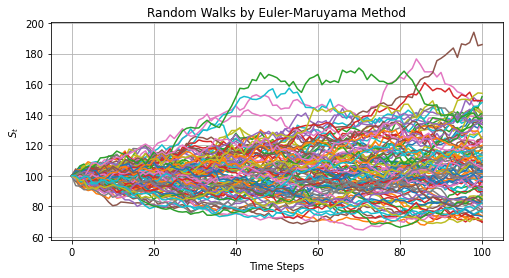

In [4]:
fig, ax = plt.subplots(figsize = (5*1.618, 4))

ax.plot(rn_random_walk(100, 1, 0.2, 0.05, 100, 100))
ax.set_title('Random Walks by Euler-Maruyama Method')
ax.set_xlabel('Time Steps')
ax.set_ylabel('$S_t$')
ax.grid()

**Step 2.** Calculate the payoff of each realisation given a payoff function

In [5]:
def realisation_payoff(payoff_func, price_paths):
    # apply the payoff function to each realisation (axis = 0 means across the column)
    return np.apply_along_axis(payoff_func, arr=price_paths, axis=0)

**Step 3 & 4.** Take average of payoff and discount to present value

In [6]:
def average_and_discount(payoffs, T, r):
    return np.exp(-r*T)*np.mean(payoffs)

The full/combined option pricing algorithm:

In [7]:
def option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func):
    # Step 1
    price_paths = rn_random_walk(S0, T, sigma, r, time_steps, num_realisations)
    # Step 2
    payoffs = realisation_payoff(payoff_func, price_paths)
    # Step 3 & 4
    option_value = average_and_discount(payoffs, T, r)
    
    return option_value

<a id='Payoff_Functions_of_Exotics'></a>
***
### Payoff Functions of Exotics
Asian Fixed Strike Call Option (Arithmetic)

In [8]:
def asian_fixed_strike_call_payoff(price_path, E, w_start = None, w_size = None):
    # default average starting from S_1 to end
    if w_size is None: # if not specified
        w_size = len(price_path) - 1 # from 1 to N+1 we have N samples
    if w_start is None: # if not specified
        w_start = len(price_path) - w_size # start the lastest given window size
    A = np.mean(price_path[w_start:w_start + w_size])
    return max(A - E, 0.0)

Asian Fixed Strike Put Option (Arithmetic)

In [9]:
def asian_fixed_strike_put_payoff(price_path, E, w_start = None, w_size = None):
    # default average starting from S_1 to end
    if w_size is None:
        w_size = len(price_path) - 1
    if w_start is None:
        w_start = len(price_path) - w_size
    A = np.mean(price_path[w_start:w_start + w_size])
    return max(E - A, 0.0)

Asian Floating Strike Call Option (Arithmetic)

In [10]:
def asian_floating_strike_call_payoff(price_path, w_start = None, w_size = None):
    # default average starting from S_1 to end
    if w_size is None:
        w_size = len(price_path) - 1
    if w_start is None:
        w_start = len(price_path) - w_size
    A = np.mean(price_path[w_start:w_start + w_size])
    return max(price_path[-1] - A, 0.0)

Asian Floating Strike Put Option (Arithmetic)

In [11]:
def asian_floating_strike_put_payoff(price_path, w_start = None, w_size = None):
    # default average starting from S_1 to end
    if w_size is None:
        w_size = len(price_path) - 1
    if w_start is None:
        w_start = len(price_path) - w_size
    A = np.mean(price_path[w_start:w_start + w_size])
    return max(A - price_path[-1], 0.0)

Asian Fixed Strike Call Option (Geometric)

In [12]:
def asian_fixed_strike_geo_call_payoff(price_path, E, w_start = None, w_size = None):
    # default average starting from S_1 to end
    if w_size is None:
        w_size = len(price_path) - 1
    if w_start is None:
        w_start = len(price_path) - w_size
    A = np.exp(np.mean(np.log(price_path[w_start:w_start + w_size])))
    return max(A - E, 0.0)

Asian Fixed Strike Put Option (Geometric)

In [13]:
def asian_fixed_strike_geo_put_payoff(price_path, E, w_start = None, w_size = None):
    # default average starting from S_1 to end
    if w_size is None:
        w_size = len(price_path) - 1
    if w_start is None:
        w_start = len(price_path) - w_size
    A = np.exp(np.mean(np.log(price_path[w_start:w_start + w_size])))
    return max(E - A, 0.0)

Asian Floating Strike Call Option (Geometric)

In [14]:
def asian_floating_strike_geo_call_payoff(price_path, w_start = None, w_size = None):
    # default average starting from S_1 to end
    if w_size is None:
        w_size = len(price_path) - 1
    if w_start is None:
        w_start = len(price_path) - w_size
    A = np.exp(np.mean(np.log(price_path[w_start:w_start + w_size])))
    return max(price_path[-1] - A, 0.0)

Asian Floating Strike Put Option (Geometric)

In [15]:
def asian_floating_strike_geo_put_payoff(price_path, w_start = None, w_size = None):
    # default average starting from S_1 to end
    if w_size is None:
        w_size = len(price_path) - 1
    if w_start is None:
        w_start = len(price_path) - w_size
    A = np.exp(np.mean(np.log(price_path[w_start:w_start + w_size])))
    return max(A - price_path[-1], 0.0)

Supershare Option

In [16]:
def supershare_payoff(price_path, B_low, B_up):
    S_T = price_path[-1]
    if (B_low <= S_T) & (S_T < B_up):
        return S_T/B_low
    else:
        return 0.0

<a id='Initial_Pricing_Example'></a>
***
### Initial Pricing Example
We first use the following set of sample parameters to price the exotic options: 
  
$\textrm{Today's stock price } S_0 = 100$  
$\textrm{Strike } E = 100$  
$\textrm{Time to expiry } (T-t) = 1 \textrm{ year}$  
$\textrm{Volatility } \sigma = 20\%$  
$\textrm{Constant risk-free interest rate } r = 5\%$  
$\textrm{Lower Boundary } B_{low} = 100$  
$\textrm{Upper Boundary } B_{up} = 150$  
$\textrm{Window Start } w_{start} = 1$  
$\textrm{Window Size } w_{size} = \textrm{Time Steps }$  
$\textrm{Time Steps } = 252$  
$\textrm{Number of Realisations } N = 100000$

In [17]:
# parameters
S0 = 100
E = 100
T = 1
sigma = 0.2
r = 0.05
time_steps = 252
# we use more realisations here to ensure that the one number result is more accurate
num_realisations = 100000
B_low = 100
B_up = 150
# averaging window starts from 1 to end
# since window parameters are set default in the payoff functions, we don't need to specify here

# dictionary to store results
init_results = {}

# Asian Fixed Strike Call Option (Arithmetic)
payoff_func = partial(asian_fixed_strike_call_payoff, E = E)
init_results['Asian Fixed Call Option (Arithmetic)'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Put Option (Arithmetic)
payoff_func = partial(asian_fixed_strike_put_payoff, E = E)
init_results['Asian Fixed Put Option (Arithmetic)'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Floating Strike Call Option (Arithmetic)
payoff_func = asian_floating_strike_call_payoff
init_results['Asian Floating Call Option (Arithmetic)'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Put Option (Arithmetic)
payoff_func = asian_floating_strike_put_payoff
init_results['Asian Floating Put Option (Arithmetic)'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Call Option (Geometric)
payoff_func = partial(asian_fixed_strike_geo_call_payoff, E = E)
init_results['Asian Fixed Call Option (Geometric)'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Put Option (Geometric)
payoff_func = partial(asian_fixed_strike_geo_put_payoff, E = E)
init_results['Asian Fixed Put Option (Geometric)'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Floating Strike Call Option (Geometric)
payoff_func = asian_floating_strike_geo_call_payoff
init_results['Asian Floating Call Option (Geometric)'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Put Option (Geometric)
payoff_func = asian_floating_strike_geo_put_payoff
init_results['Asian Floating Put Option (Geometric)'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Supershare Option
payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)
init_results['Supershare Option'] = option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func)


# print results
init_df = pd.DataFrame.from_dict([init_results]).T
init_df.columns = ['Initital Pricing Results']
init_df

,Initital Pricing Results
Asian Fixed Call Option (Arithmetic),5.782991
Asian Fixed Put Option (Arithmetic),3.358232
Asian Floating Call Option (Arithmetic),5.824674
Asian Floating Put Option (Arithmetic),3.389377
Asian Fixed Call Option (Geometric),5.550229
Asian Fixed Put Option (Geometric),3.428814
Asian Floating Call Option (Geometric),6.022987
Asian Floating Put Option (Geometric),3.290961
Supershare Option,0.588398


The initial results are quite intuitive:
1. We can see that the value of Asian fixed call option is much higher than Asian fixed put option. This make a lot of sense since we have a positive drift $r$ with $S_0$ started at strike, which makes it easier for the call option to be in-the-money (ITM) compared to the put counterpart.
2. Since the geometric average of non-negative real numbers $S_t$ are smaller than or equal to the arithmetic average, geometic fixed call has a lower value than the arithmetic counterpart (since payoff is $max(A - E, 0)$, and geometric floating call has a higher value (since payoff is $max(S_T - A, 0)$). Vice versa for put. (i.e. fixed geometric > fixed arithmetic and floating geometric < floating arithmetic)

<a id='Effects_on_the_Option_Price'></a>
***
***
***
## Effects on the Option Price
In the following section, we would vary one parameter at a time, while holding others unchanged, to see how a specific parameter would affect the option price. Then we would try to explain why the option prices move with/against the parameters.

<a id='Varying_Strike'></a>
### Varying Strike $E$
We vary the strike $E$ from 0 to 200 (with step size 2 for faster computation) and approximate the option value for each $E$, while holding all other variables unchanged, to see how $E$ alone affects the option price.

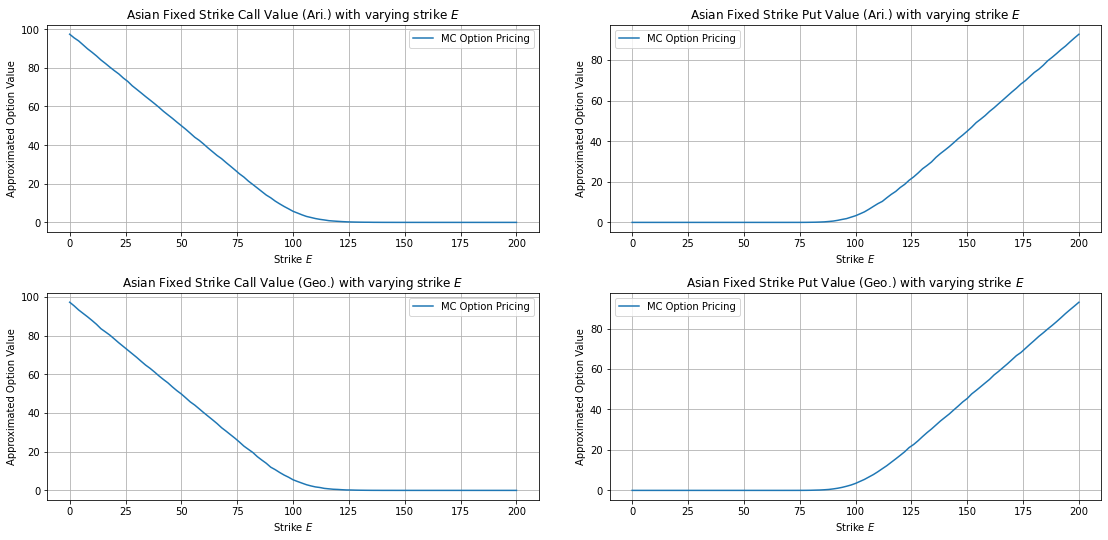

In [18]:
# parameters
S0 = 100
T = 1
sigma = 0.2
r = 0.05
time_steps = 252
num_realisations = 10000
B_low = 100
B_up = 150
E_range = np.arange(0,201,2)

# lists to store results
asian_fixed_strike_calls_vary_E  = []
asian_fixed_strike_puts_vary_E  = []
asian_fixed_strike_geo_calls_vary_E  = []
asian_fixed_strike_geo_puts_vary_E  = []

# simulations
for E in E_range:
    # Asian Fixed Strike Options
    payoff_func = partial(asian_fixed_strike_call_payoff, E = E)
    asian_fixed_strike_calls_vary_E.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
    payoff_func = partial(asian_fixed_strike_put_payoff, E = E)
    asian_fixed_strike_puts_vary_E.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
    payoff_func = partial(asian_fixed_strike_geo_call_payoff, E = E)
    asian_fixed_strike_geo_calls_vary_E.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
    payoff_func = partial(asian_fixed_strike_geo_put_payoff, E = E)
    asian_fixed_strike_geo_puts_vary_E.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
    # Does not affect Asian Floating Strike Options (no E in Payoff)

    # Does not affect Supershare Option (no E in Payoff)

# plots
fig, ax = plt.subplots(2,2, figsize = (5*1.618*2, 4*2))
fig.tight_layout(pad = 4)

ax[0,0].plot(E_range, asian_fixed_strike_calls_vary_E, label = 'MC Option Pricing')
ax[0,0].set_title('Asian Fixed Strike Call Value (Ari.) with varying strike $E$')
ax[0,0].set_xlabel('Strike $E$')
ax[0,0].set_ylabel('Approximated Option Value')
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].plot(E_range, asian_fixed_strike_puts_vary_E, label = 'MC Option Pricing')
ax[0,1].set_title('Asian Fixed Strike Put Value (Ari.) with varying strike $E$')
ax[0,1].set_xlabel('Strike $E$')
ax[0,1].set_ylabel('Approximated Option Value')
ax[0,1].legend()
ax[0,1].grid()

ax[1,0].plot(E_range, asian_fixed_strike_geo_calls_vary_E, label = 'MC Option Pricing')
ax[1,0].set_title('Asian Fixed Strike Call Value (Geo.) with varying strike $E$')
ax[1,0].set_xlabel('Strike $E$')
ax[1,0].set_ylabel('Approximated Option Value')
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].plot(E_range, asian_fixed_strike_geo_puts_vary_E, label = 'MC Option Pricing')
ax[1,1].set_title('Asian Fixed Strike Put Value (Geo.) with varying strike $E$')
ax[1,1].set_xlabel('Strike $E$')
ax[1,1].set_ylabel('Approximated Option Value')
ax[1,1].legend()
ax[1,1].grid()

The result is similar to what one would expect for a vanilla option. Here we use the Asian fixed call options to illustrate:
- When the strikes are very low, the options are deep ITM, the probability of $S_T$ higher than strike is close to 1. Hence, if the strike increases by one, it is almost certain that the payoff will be less by one. So the slope is roughly -1 on the left hand side
- When the strike are very high, the options are deep out-of-the-money (OTM), the probability of $S_T$ higher than strike is close to 0. Hence, it is almost certain that the payoff will be 0 (therefore not affected by the change in strike). So the slope is roughly 0 on the right hand side
- Around the strike 100, changing the strike will affect both the probability of being ITM and the intrinsic value / exact payoff if the option finishes ITM, hence a curve shape is observed as the interaction is non-linear

Vice versa for Asian fixed put options.

<a id='Varying_Volatility'></a>
***
### Varying Volatility $\sigma$
We vary the volatility $\sigma$ from 0 to 60% and approximate the option value for each $\sigma$, while holding all other variables unchanged, to see how $\sigma$ alone affects the option price.

(0.0, 1.0, 0.0, 1.0)

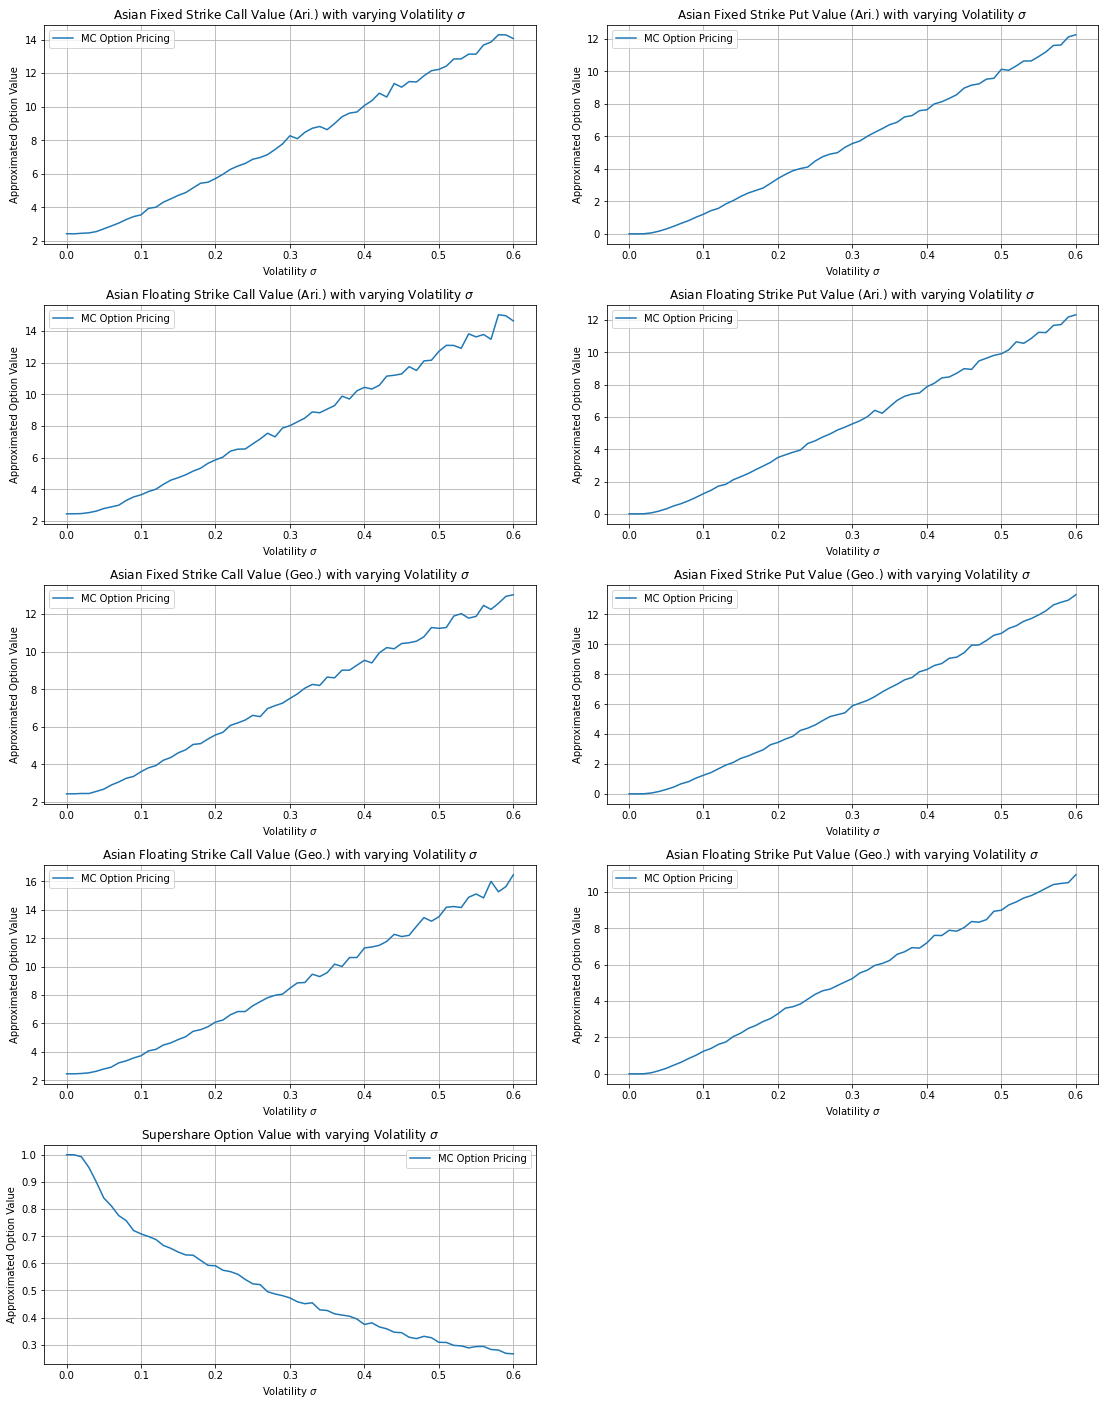

In [19]:
# parameters
S0 = 100
T = 1
E = 100
r = 0.05
time_steps = 252
num_realisations = 10000
B_low = 100
B_up = 150
sigma_range = np.arange(0,61)/100

# lists to store the results
asian_fixed_strike_calls_vary_sigma  = []
asian_fixed_strike_puts_vary_sigma  = []
asian_floating_strike_calls_vary_sigma  = []
asian_floating_strike_puts_vary_sigma  = []
asian_fixed_strike_geo_calls_vary_sigma  = []
asian_fixed_strike_geo_puts_vary_sigma  = []
asian_floating_strike_geo_calls_vary_sigma  = []
asian_floating_strike_geo_puts_vary_sigma  = []
supershares_vary_sigma  = []

# simulations
# Asian options (Arithmetic)
payoff_func = partial(asian_fixed_strike_call_payoff, E = E)
for sigma in sigma_range:
    asian_fixed_strike_calls_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

payoff_func = partial(asian_fixed_strike_put_payoff, E = E)
for sigma in sigma_range:
    asian_fixed_strike_puts_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_call_payoff
for sigma in sigma_range:
    asian_floating_strike_calls_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_put_payoff
for sigma in sigma_range:
    asian_floating_strike_puts_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Asian options (Geometic)
payoff_func = partial(asian_fixed_strike_geo_call_payoff, E = E)
for sigma in sigma_range:
    asian_fixed_strike_geo_calls_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

payoff_func = partial(asian_fixed_strike_geo_put_payoff, E = E)
for sigma in sigma_range:
    asian_fixed_strike_geo_puts_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_geo_call_payoff
for sigma in sigma_range:
    asian_floating_strike_geo_calls_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_geo_put_payoff
for sigma in sigma_range:
    asian_floating_strike_geo_puts_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Supershare Option
payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)
for sigma in sigma_range:
    supershares_vary_sigma.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
# plots
fig, ax = plt.subplots(5, 2, figsize = (5*1.618*2, 4*5))
fig.tight_layout(pad = 4)

ax[0, 0].plot(sigma_range, asian_fixed_strike_calls_vary_sigma, label = 'MC Option Pricing')
ax[0, 0].set_title('Asian Fixed Strike Call Value (Ari.) with varying Volatility $\sigma$')
ax[0, 0].set_xlabel('Volatility $\sigma$')
ax[0, 0].set_ylabel('Approximated Option Value')
ax[0, 0].legend()
ax[0, 0].grid()

ax[0, 1].plot(sigma_range, asian_fixed_strike_puts_vary_sigma, label = 'MC Option Pricing')
ax[0, 1].set_title('Asian Fixed Strike Put Value (Ari.) with varying Volatility $\sigma$')
ax[0, 1].set_xlabel('Volatility $\sigma$')
ax[0, 1].set_ylabel('Approximated Option Value')
ax[0, 1].legend()
ax[0, 1].grid()

ax[1, 0].plot(sigma_range, asian_floating_strike_calls_vary_sigma, label = 'MC Option Pricing')
ax[1, 0].set_title('Asian Floating Strike Call Value (Ari.) with varying Volatility $\sigma$')
ax[1, 0].set_xlabel('Volatility $\sigma$')
ax[1, 0].set_ylabel('Approximated Option Value')
ax[1, 0].legend()
ax[1, 0].grid()

ax[1, 1].plot(sigma_range, asian_floating_strike_puts_vary_sigma, label = 'MC Option Pricing')
ax[1, 1].set_title('Asian Floating Strike Put Value (Ari.) with varying Volatility $\sigma$')
ax[1, 1].set_xlabel('Volatility $\sigma$')
ax[1, 1].set_ylabel('Approximated Option Value')
ax[1, 1].legend()
ax[1, 1].grid()

ax[2, 0].plot(sigma_range, asian_fixed_strike_geo_calls_vary_sigma, label = 'MC Option Pricing')
ax[2, 0].set_title('Asian Fixed Strike Call Value (Geo.) with varying Volatility $\sigma$')
ax[2, 0].set_xlabel('Volatility $\sigma$')
ax[2, 0].set_ylabel('Approximated Option Value')
ax[2, 0].legend()
ax[2, 0].grid()

ax[2, 1].plot(sigma_range, asian_fixed_strike_geo_puts_vary_sigma, label = 'MC Option Pricing')
ax[2, 1].set_title('Asian Fixed Strike Put Value (Geo.) with varying Volatility $\sigma$')
ax[2, 1].set_xlabel('Volatility $\sigma$')
ax[2, 1].set_ylabel('Approximated Option Value')
ax[2, 1].legend()
ax[2, 1].grid()

ax[3, 0].plot(sigma_range, asian_floating_strike_geo_calls_vary_sigma, label = 'MC Option Pricing')
ax[3, 0].set_title('Asian Floating Strike Call Value (Geo.) with varying Volatility $\sigma$')
ax[3, 0].set_xlabel('Volatility $\sigma$')
ax[3, 0].set_ylabel('Approximated Option Value')
ax[3, 0].legend()
ax[3, 0].grid()

ax[3, 1].plot(sigma_range, asian_floating_strike_geo_puts_vary_sigma, label = 'MC Option Pricing')
ax[3, 1].set_title('Asian Floating Strike Put Value (Geo.) with varying Volatility $\sigma$')
ax[3, 1].set_xlabel('Volatility $\sigma$')
ax[3, 1].set_ylabel('Approximated Option Value')
ax[3, 1].legend()
ax[3, 1].grid()

ax[4, 0].plot(sigma_range, supershares_vary_sigma, label = 'MC Option Pricing')
ax[4, 0].set_title('Supershare Option Value with varying Volatility $\sigma$')
ax[4, 0].set_xlabel('Volatility $\sigma$')
ax[4, 0].set_ylabel('Approximated Option Value')
ax[4, 0].legend()
ax[4, 0].grid()

ax[4, 1].axis('off')

The graphs above shows that when the volatility of the underlying is higher, the fair price for all Asian options should be higher. Again, this is in line with what we would expect for a vanilla option.
- An intuitive explanation would be that when volatility is higher, the expected price range of the upward drift underlying increases, so there is a higher chance that the options finish ITM and the payoff if ITM increases as well  

However, we can see that the supershare option value decreases with volatility.
- This is sensible as the supershare option is upper and lower bounded. When volatility increases, the expected price range increases, so less price path will finish within bound, hence more likely to get 0 payoff
- Do note that the option values stayed at around 1 (and even increased a bit) before it drastically decrease with volatility increasing. If the boundaries are wider and volatility is relatively low, we should see a slight increase of volatility benefiting the supershare value for a short while, as payoff if ITM increases

<a id='Varying_Interest_Growth_Rate'></a>
***
### Varying Interest/Growth Rate $r$
We vary the risk-free interest $r$ from -10% to 40% and approximate the option value for each $r$, while holding all other variables unchanged, to see how $r$ alone affects the option price.

(0.0, 1.0, 0.0, 1.0)

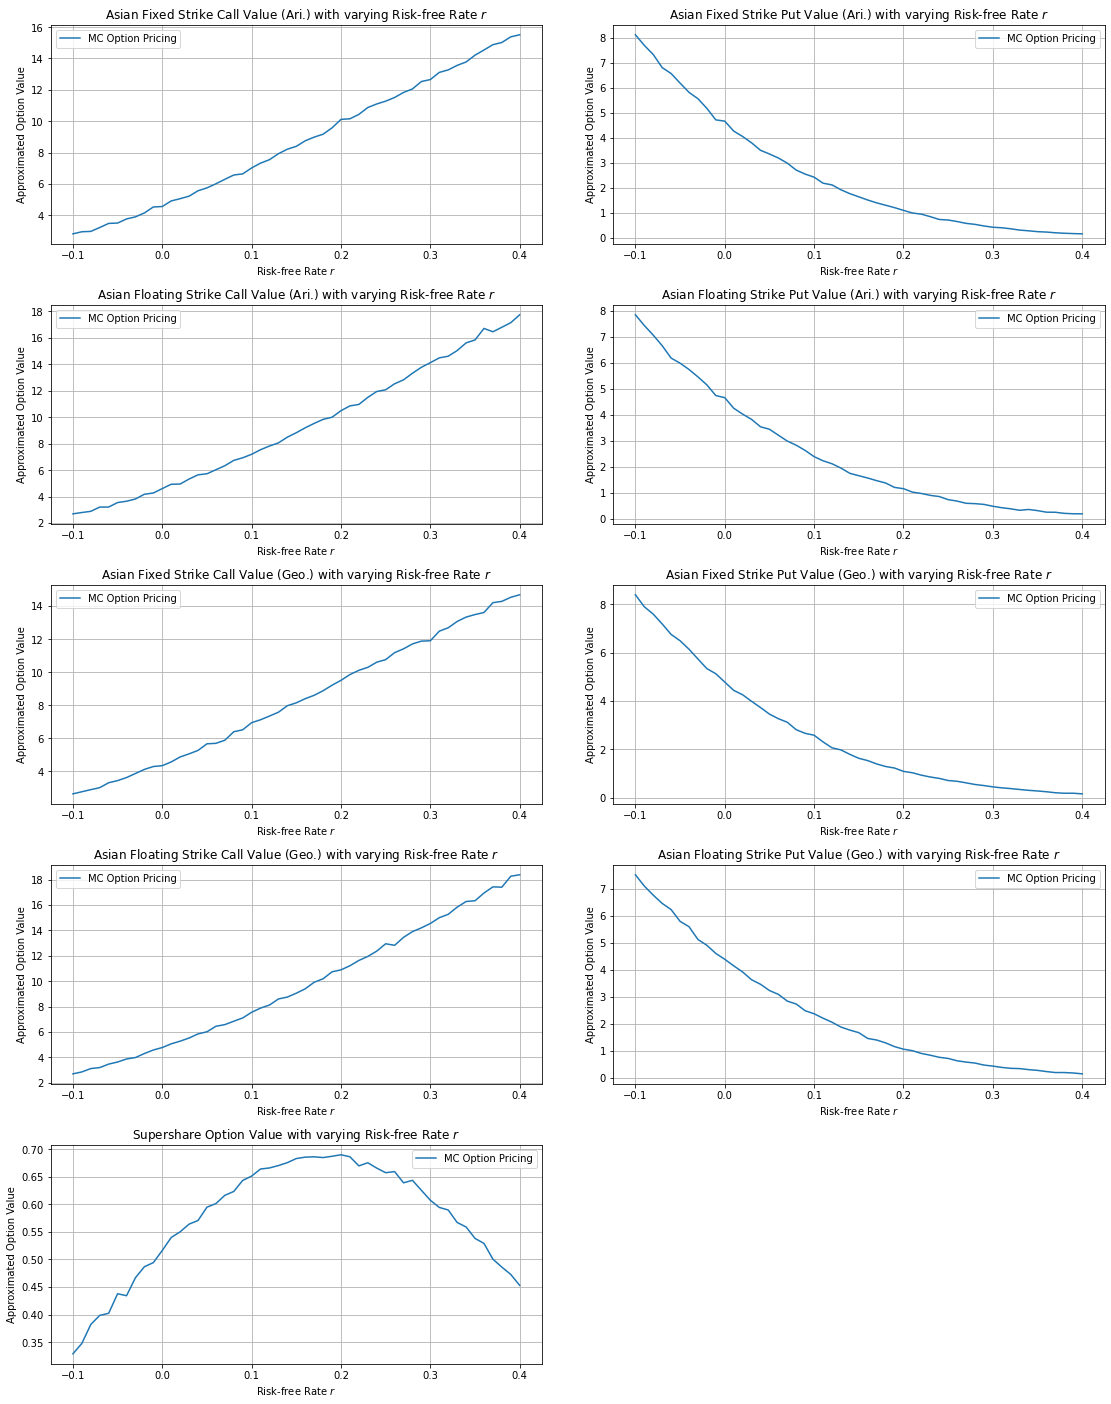

In [20]:
# parameters
S0 = 100
T = 1
E = 100
sigma = 0.2
time_steps = 252
num_realisations = 10000
B_low = 100
B_up = 150
r_range = np.arange(-10,41)/100

# lists to store results
asian_fixed_strike_calls_vary_r  = []
asian_fixed_strike_puts_vary_r  = []
asian_floating_strike_calls_vary_r  = []
asian_floating_strike_puts_vary_r  = []
asian_fixed_strike_geo_calls_vary_r  = []
asian_fixed_strike_geo_puts_vary_r  = []
asian_floating_strike_geo_calls_vary_r  = []
asian_floating_strike_geo_puts_vary_r  = []
supershares_vary_r  = []

# simulations
# Asian options (Arithmetic)
payoff_func = partial(asian_fixed_strike_call_payoff, E = E)
for r in r_range:
    asian_fixed_strike_calls_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

payoff_func = partial(asian_fixed_strike_put_payoff, E = E)
for r in r_range:
    asian_fixed_strike_puts_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_call_payoff
for r in r_range:
    asian_floating_strike_calls_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_put_payoff
for r in r_range:
    asian_floating_strike_puts_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Asian options (Geometic)
payoff_func = partial(asian_fixed_strike_geo_call_payoff, E = E)
for r in r_range:
    asian_fixed_strike_geo_calls_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

payoff_func = partial(asian_fixed_strike_geo_put_payoff, E = E)
for r in r_range:
    asian_fixed_strike_geo_puts_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_geo_call_payoff
for r in r_range:
    asian_floating_strike_geo_calls_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_geo_put_payoff
for r in r_range:
    asian_floating_strike_geo_puts_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Supershare option
payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)
for r in r_range:
    supershares_vary_r.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
# plots
fig, ax = plt.subplots(5, 2, figsize = (5*1.618*2, 4*5))
fig.tight_layout(pad = 4)

ax[0, 0].plot(r_range, asian_fixed_strike_calls_vary_r, label = 'MC Option Pricing')
ax[0, 0].set_title('Asian Fixed Strike Call Value (Ari.) with varying Risk-free Rate $r$')
ax[0, 0].set_xlabel('Risk-free Rate $r$')
ax[0, 0].set_ylabel('Approximated Option Value')
ax[0, 0].legend()
ax[0, 0].grid()

ax[0, 1].plot(r_range, asian_fixed_strike_puts_vary_r, label = 'MC Option Pricing')
ax[0, 1].set_title('Asian Fixed Strike Put Value (Ari.) with varying Risk-free Rate $r$')
ax[0, 1].set_xlabel('Risk-free Rate $r$')
ax[0, 1].set_ylabel('Approximated Option Value')
ax[0, 1].legend()
ax[0, 1].grid()

ax[1, 0].plot(r_range, asian_floating_strike_calls_vary_r, label = 'MC Option Pricing')
ax[1, 0].set_title('Asian Floating Strike Call Value (Ari.) with varying Risk-free Rate $r$')
ax[1, 0].set_xlabel('Risk-free Rate $r$')
ax[1, 0].set_ylabel('Approximated Option Value')
ax[1, 0].legend()
ax[1, 0].grid()

ax[1, 1].plot(r_range, asian_floating_strike_puts_vary_r, label = 'MC Option Pricing')
ax[1, 1].set_title('Asian Floating Strike Put Value (Ari.) with varying Risk-free Rate $r$')
ax[1, 1].set_xlabel('Risk-free Rate $r$')
ax[1, 1].set_ylabel('Approximated Option Value')
ax[1, 1].legend()
ax[1, 1].grid()

ax[2, 0].plot(r_range, asian_fixed_strike_geo_calls_vary_r, label = 'MC Option Pricing')
ax[2, 0].set_title('Asian Fixed Strike Call Value (Geo.) with varying Risk-free Rate $r$')
ax[2, 0].set_xlabel('Risk-free Rate $r$')
ax[2, 0].set_ylabel('Approximated Option Value')
ax[2, 0].legend()
ax[2, 0].grid()

ax[2, 1].plot(r_range, asian_fixed_strike_geo_puts_vary_r, label = 'MC Option Pricing')
ax[2, 1].set_title('Asian Fixed Strike Put Value (Geo.) with varying Risk-free Rate $r$')
ax[2, 1].set_xlabel('Risk-free Rate $r$')
ax[2, 1].set_ylabel('Approximated Option Value')
ax[2, 1].legend()
ax[2, 1].grid()

ax[3, 0].plot(r_range, asian_floating_strike_geo_calls_vary_r, label = 'MC Option Pricing')
ax[3, 0].set_title('Asian Floating Strike Call Value (Geo.) with varying Risk-free Rate $r$')
ax[3, 0].set_xlabel('Risk-free Rate $r$')
ax[3, 0].set_ylabel('Approximated Option Value')
ax[3, 0].legend()
ax[3, 0].grid()

ax[3, 1].plot(r_range, asian_floating_strike_geo_puts_vary_r, label = 'MC Option Pricing')
ax[3, 1].set_title('Asian Floating Strike Put Value (Geo.) with varying Risk-free Rate $r$')
ax[3, 1].set_xlabel('Risk-free Rate $r$')
ax[3, 1].set_ylabel('Approximated Option Value')
ax[3, 1].legend()
ax[3, 1].grid()

ax[4, 0].plot(r_range, supershares_vary_r, label = 'MC Option Pricing')
ax[4, 0].set_title('Supershare Option Value with varying Risk-free Rate $r$')
ax[4, 0].set_xlabel('Risk-free Rate $r$')
ax[4, 0].set_ylabel('Approximated Option Value')
ax[4, 0].legend()
ax[4, 0].grid()

ax[4, 1].axis('off')

As we see from the above plots, Asian call option values increase with the interest/growth rate while the Asian put option values decrease with the interest/growth rate. The mathematical relationships are complex (higher $r$ increases drift but also increases discounting) but this could be intuitively explained by:
- Call Option: When we buy a call option, we are gaining the long exposure on a stock without requiring to pay the full stock price (we only need to pay the "premium"). Hence, we saved a lot of cash, which can generate more nominal value when rates are higher (invest in risk free rate), and therefore the call option is more valuable. From another perspective, in a high interest rate environment, the call option sellers are disadvantaged since they would need to borrow cash at a higher rate to fund their hedging position (probably long the underlying) of selling the call option, so they would only be willing to sell a call option which is more expensive to compensate the expensive hedging cost.
- Put Option: When a trader sells a put option, he/she gains long position for the underlying and would probably sell the underlying to hedge the delta. He/she would received cash immediately for selling the underlying. In a high interest rate environment, he/she could invest that cash at a high risk-free rate, thus the hedging cost is cheaper. So he/she can offer a put option with lower price.

For supershare options, since the payoff is in the same direction as a call option when the underlying price are within the boundaries, similar to a call option, higher interest rates are also beneficial to the supershare option price. However, there are two reasons why the option prices fall off when interest rates are too high:
1. Since the interest rate is also the drift in our underlying price path, an $r$ that is too high would cause many price path to go beyond the upper bound, hence resulting in 0 payoff
2. Unlike other call options where the payoff could be benefited from higher drift, the payoff of supershare option is capped at $\frac{B_{up}}{B_{low}}$, so the payoff if ITM can only be lower because of higher discounting, not to mention they would become 0 if they exceeded the upper bound

<a id='Varying_Time_to_Expiry'></a>
***
### Varying Time to Expiry $(T - t)$
We vary the time to expiry $(T - t)$ from 0.25 year to 3 years and approximate the option value for each $(T - t)$, adjusting the number of time steps proportionally, while holding all other variables unchanged, to see how $(T - t)$ affects the option price.

(0.0, 1.0, 0.0, 1.0)

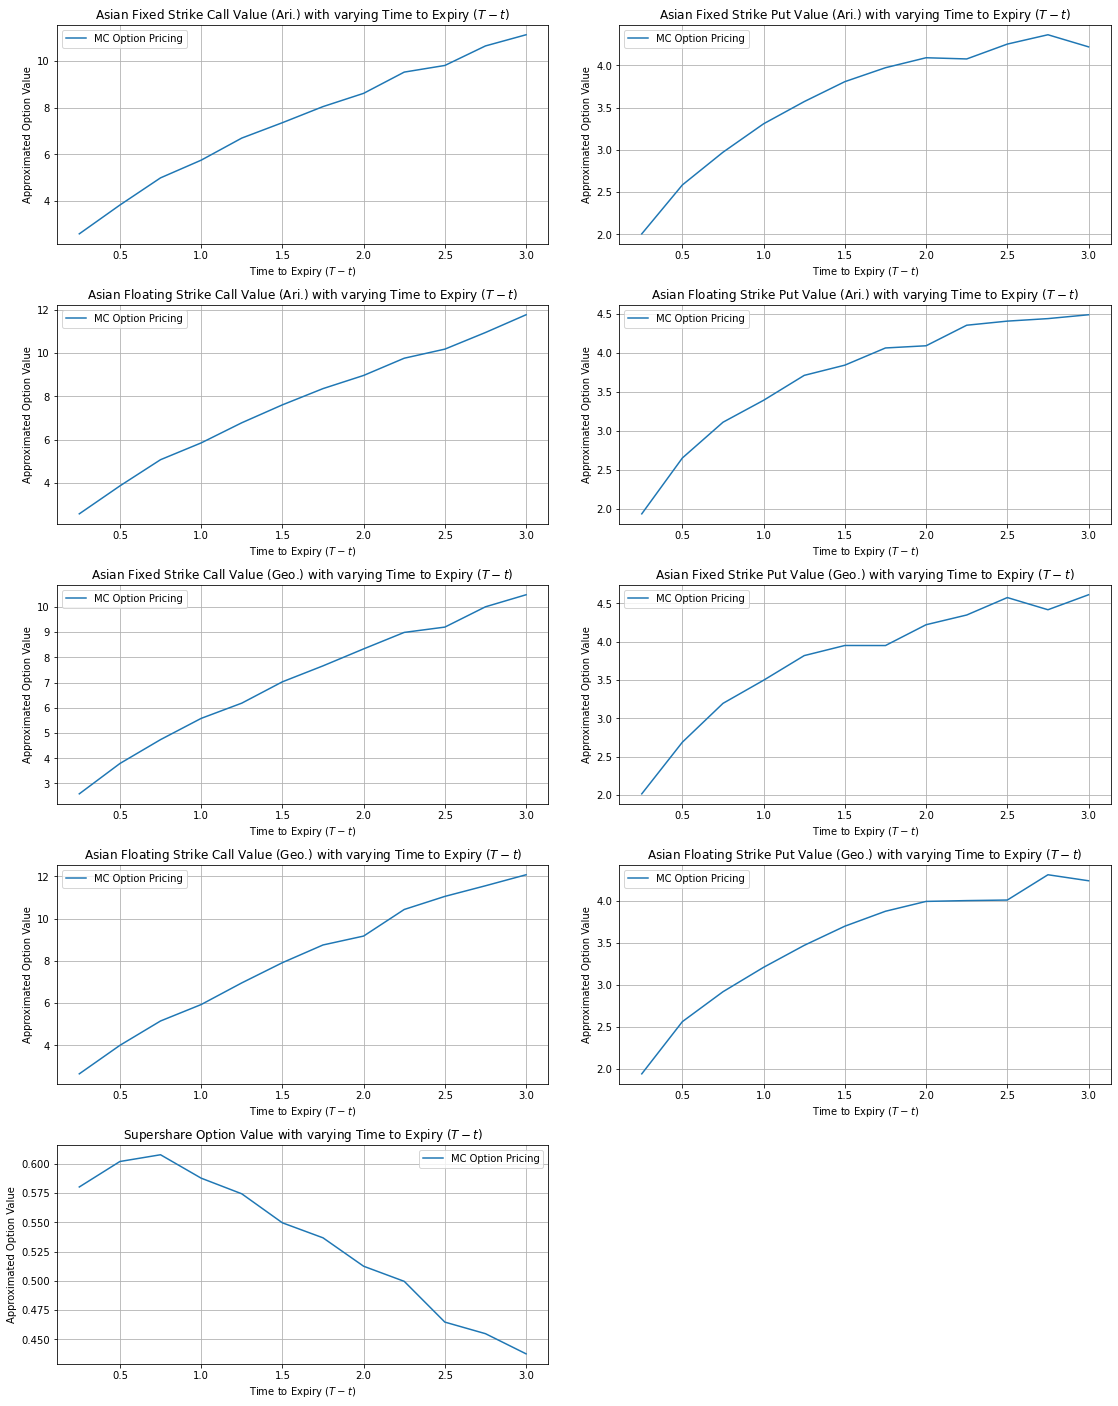

In [21]:
# parameters
S0 = 100
E = 100
sigma = 0.2
r = 0.05
num_realisations = 10000
B_low = 100
B_up = 150
T_range = np.arange(25,325,25)/100
time_steps_base = 252

# lists to store results
asian_fixed_strike_calls_vary_T  = []
asian_fixed_strike_puts_vary_T  = []
asian_floating_strike_calls_vary_T  = []
asian_floating_strike_puts_vary_T  = []
asian_fixed_strike_geo_calls_vary_T  = []
asian_fixed_strike_geo_puts_vary_T  = []
asian_floating_strike_geo_calls_vary_T  = []
asian_floating_strike_geo_puts_vary_T  = []
supershares_vary_T  = []

# simulations
# Asian options (Arithmetic)
payoff_func = partial(asian_fixed_strike_call_payoff, E = E)
for T in T_range:
    time_steps = int(time_steps_base * T) # time steps adjusted
    asian_fixed_strike_calls_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

payoff_func = partial(asian_fixed_strike_put_payoff, E = E)
for T in T_range:
    time_steps = int(time_steps_base * T)
    asian_fixed_strike_puts_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_call_payoff
for T in T_range:
    time_steps = int(time_steps_base * T)
    asian_floating_strike_calls_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_put_payoff
for T in T_range:
    time_steps = int(time_steps_base * T)
    asian_floating_strike_puts_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
# Asian options (Geometric)
payoff_func = partial(asian_fixed_strike_geo_call_payoff, E = E)
for T in T_range:
    time_steps = int(time_steps_base * T)
    asian_fixed_strike_geo_calls_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

payoff_func = partial(asian_fixed_strike_geo_put_payoff, E = E)
for T in T_range:
    time_steps = int(time_steps_base * T)
    asian_fixed_strike_geo_puts_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_geo_call_payoff
for T in T_range:
    time_steps = int(time_steps_base * T)
    asian_floating_strike_geo_calls_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
payoff_func = asian_floating_strike_geo_put_payoff
for T in T_range:
    time_steps = int(time_steps_base * T)
    asian_floating_strike_geo_puts_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Supershare option
payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)
for T in T_range:
    time_steps = int(time_steps_base * T)
    supershares_vary_T.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
# plots
fig, ax = plt.subplots(5, 2, figsize = (5*1.618*2, 4*5))
fig.tight_layout(pad = 4)

ax[0, 0].plot(T_range, asian_fixed_strike_calls_vary_T, label = 'MC Option Pricing')
ax[0, 0].set_title('Asian Fixed Strike Call Value (Ari.) with varying Time to Expiry $(T - t)$')
ax[0, 0].set_xlabel('Time to Expiry $(T - t)$')
ax[0, 0].set_ylabel('Approximated Option Value')
ax[0, 0].legend()
ax[0, 0].grid()

ax[0, 1].plot(T_range, asian_fixed_strike_puts_vary_T, label = 'MC Option Pricing')
ax[0, 1].set_title('Asian Fixed Strike Put Value (Ari.) with varying Time to Expiry $(T - t)$')
ax[0, 1].set_xlabel('Time to Expiry $(T - t)$')
ax[0, 1].set_ylabel('Approximated Option Value')
ax[0, 1].legend()
ax[0, 1].grid()

ax[1, 0].plot(T_range, asian_floating_strike_calls_vary_T, label = 'MC Option Pricing')
ax[1, 0].set_title('Asian Floating Strike Call Value (Ari.) with varying Time to Expiry $(T - t)$')
ax[1, 0].set_xlabel('Time to Expiry $(T - t)$')
ax[1, 0].set_ylabel('Approximated Option Value')
ax[1, 0].legend()
ax[1, 0].grid()

ax[1, 1].plot(T_range, asian_floating_strike_puts_vary_T, label = 'MC Option Pricing')
ax[1, 1].set_title('Asian Floating Strike Put Value (Ari.) with varying Time to Expiry $(T - t)$')
ax[1, 1].set_xlabel('Time to Expiry $(T - t)$')
ax[1, 1].set_ylabel('Approximated Option Value')
ax[1, 1].legend()
ax[1, 1].grid()

ax[2, 0].plot(T_range, asian_fixed_strike_geo_calls_vary_T, label = 'MC Option Pricing')
ax[2, 0].set_title('Asian Fixed Strike Call Value (Geo.) with varying Time to Expiry $(T - t)$')
ax[2, 0].set_xlabel('Time to Expiry $(T - t)$')
ax[2, 0].set_ylabel('Approximated Option Value')
ax[2, 0].legend()
ax[2, 0].grid()

ax[2, 1].plot(T_range, asian_fixed_strike_geo_puts_vary_T, label = 'MC Option Pricing')
ax[2, 1].set_title('Asian Fixed Strike Put Value (Geo.) with varying Time to Expiry $(T - t)$')
ax[2, 1].set_xlabel('Time to Expiry $(T - t)$')
ax[2, 1].set_ylabel('Approximated Option Value')
ax[2, 1].legend()
ax[2, 1].grid()

ax[3, 0].plot(T_range, asian_floating_strike_geo_calls_vary_T, label = 'MC Option Pricing')
ax[3, 0].set_title('Asian Floating Strike Call Value (Geo.) with varying Time to Expiry $(T - t)$')
ax[3, 0].set_xlabel('Time to Expiry $(T - t)$')
ax[3, 0].set_ylabel('Approximated Option Value')
ax[3, 0].legend()
ax[3, 0].grid()

ax[3, 1].plot(T_range, asian_floating_strike_geo_puts_vary_T, label = 'MC Option Pricing')
ax[3, 1].set_title('Asian Floating Strike Put Value (Geo.) with varying Time to Expiry $(T - t)$')
ax[3, 1].set_xlabel('Time to Expiry $(T - t)$')
ax[3, 1].set_ylabel('Approximated Option Value')
ax[3, 1].legend()
ax[3, 1].grid()

ax[4, 0].plot(T_range, supershares_vary_T, label = 'MC Option Pricing')
ax[4, 0].set_title('Supershare Option Value with varying Time to Expiry $(T - t)$')
ax[4, 0].set_xlabel('Time to Expiry $(T - t)$')
ax[4, 0].set_ylabel('Approximated Option Value')
ax[4, 0].legend()
ax[4, 0].grid()

ax[4, 1].axis('off')

For the Asian options, this is once again similar to what one might expect for vanilla options. An option value could be divided into two parts, time value and intrinsic value. When time to expiry increases, the time value increases. This is due to the fact that:
- When time increases, assuming volatility of the underlying unchanged, the deviation for the final stock price would be higher since there are more time steps (given same step size). As explained before, increased volatility of the final price is beneficial to the contract holder, since the finishing price range becomes wilder
- When time increases, uncertainity increases (e.g. it is harder to predict the stock price in 3 years than 1 day). Options could be thought of as an protection against uncertainity, so when the uncertainity is larger, one should pay more for the insurance
- Do note that the increase in time value is diminishing when we have a very large time to expiry, since the uncertainity does not increase as much. (e.g. 10 years is not very different from 11 years, but 1 days is very different from 1 year in terms of uncertainity)

For the supershare option, the option value first increases with time to expiry, probably because of the increased final price range with upward drift that is within bound, which leads to a better payoff. However, the payoffs start to drop from 1 year, this is likely caused by the increasing price range with upward drift which exceeds the upper bound, hence the probability of ending with 0 payoff is higher.

<a id='Varying_Upper_Boundary'></a>
***
### Varying Upper Boundary $B_{up}$
We vary the upper boundary $B_{up}$ from 100 to 200 and approximate the option value for each $B_{up}$, while holding all other variables unchanged, to see how $B_{up}$ alone affects the option price.

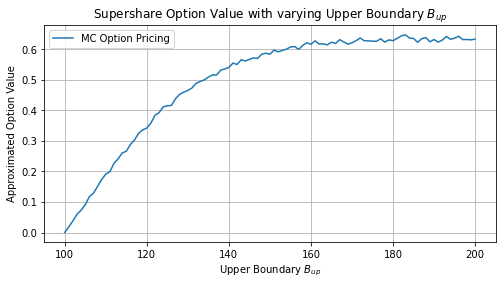

In [22]:
# parameters
S0 = 100
T = 1
sigma = 0.2
r = 0.05
E = 100
time_steps = 252
num_realisations = 10000
B_low = 100
B_up_range = np.arange(100,201)

# list to store results
supershares_vary_B_up  = []

# simulations
for B_up in B_up_range:
    
    # Does not affect Asian Fixed Strike Option (no B_up in Payoff)
    
    # Does not affect Asian Floating Strike Option (no B_up in Payoff)

    # Supershare option
    payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)
    supershares_vary_B_up.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# plot
fig, ax = plt.subplots(figsize = (5*1.618, 4))

ax.plot(B_up_range, supershares_vary_B_up, label = 'MC Option Pricing')
ax.set_title('Supershare Option Value with varying Upper Boundary $B_{up}$')
ax.set_xlabel('Upper Boundary $B_{up}$')
ax.set_ylabel('Approximated Option Value')
ax.legend()
ax.grid()

The only thing the upper boundary affects is the probability of the supershare option finishing ITM. When the upper boundary decreases, the probability decreases, hence the option value decreases. On the countary, when the upper boundary increases, the probability increases, hence the option value increases. Yet, the probability increment diminishes when the upper boundary becomes too high, as a very high upper bound already made almost all price paths ITM, and further increasing it would not let more price paths ITM.

<a id='Varying_Lower_Boundary'></a>
***
### Varying Lower Boundary $B_{low}$
We vary the lower boundary $B_{low}$ from 10 to 150 and approximate the option value for each $B_{low}$, while holding all other variables unchanged, to see how $B_{low}$ alone affects the option price.

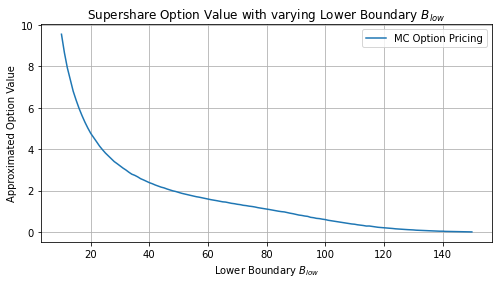

In [23]:
# parameters
S0 = 100
T = 1
sigma = 0.2
r = 0.05
E = 100
time_steps = 252
num_realisations = 10000
B_up = 150
B_low_range = np.arange(10,151)

# list to store results
supershares_vary_B_low  = []

# simulations
for B_low in B_low_range:
    
    # Does not affect Asian Fixed Strike Option (no B_low in Payoff)
    
    # Does not affect Asian Floating Strike Option (no B_low in Payoff)

    # Supershare option
    payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)
    supershares_vary_B_low.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# plot
fig, ax = plt.subplots(figsize = (5*1.618, 4))

ax.plot(B_low_range, supershares_vary_B_low, label = 'MC Option Pricing')
ax.set_title('Supershare Option Value with varying Lower Boundary $B_{low}$')
ax.set_xlabel('Lower Boundary $B_{low}$')
ax.set_ylabel('Approximated Option Value')
ax.legend()
ax.grid()

Similar to the upper boundary, the lower boundary affects the region of ITM. However, the lower boundary also affects the payoff if ITM. When the lower boundary increases, the probability of ITM becomes lower, and the payoff if ITM is divided by a larger number, both effects negatively affects the supershare option price. On the countary, when the lower boundary decreases, the probability of ITM becomes higher, and the payoff if ITM is divided by a smaller number, both positively affects the option price. Since the both effects are on the same side and the effect from the denominator could be very significant (especially when it is very small), we can see the magnitude of option value change much stronger compared to varying the upper bound.

<a id='Varying_Window_Size'></a>
***
### Varying Average Window Size $w_{size}$
We vary the window size $w_{size}$ from 1 to 252 (with step 5) and approximate the option value for each $w_{size}$, while holding all other variables unchanged, to see how $w_{size}$ alone affects the option price. When we change the window size, we are always refering to the average of the latest observations (i.e. window size of 10 means average of the last 10 observations).

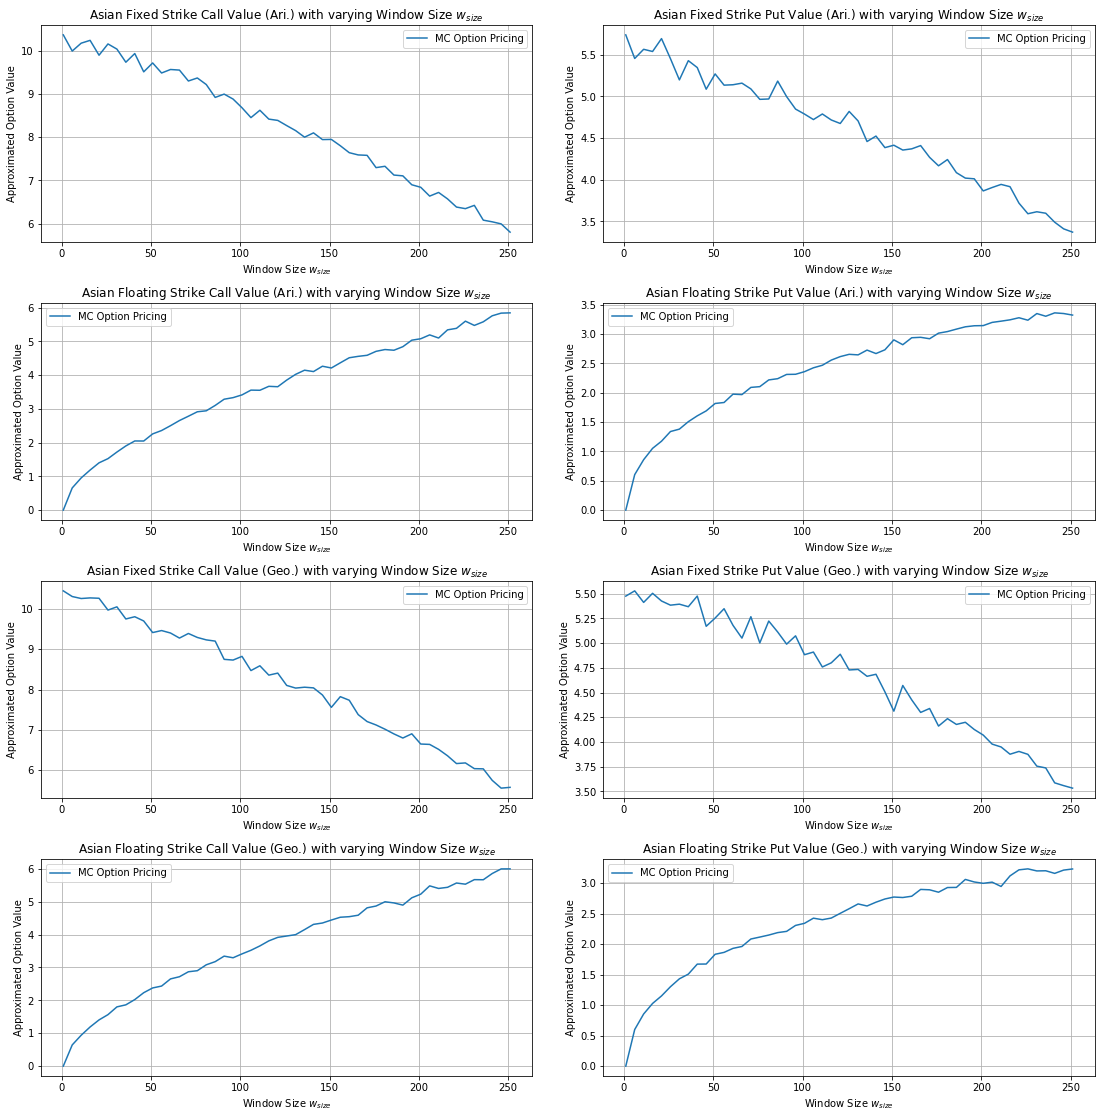

In [24]:
# parameters
S0 = 100
T = 1
E = 100
sigma = 0.2
time_steps = 252
num_realisations = 10000
B_low = 100
B_up = 150
r = 0.05
wsize_range = np.arange(1, 253, 5)

# lists to store results
asian_fixed_strike_calls_vary_wsize  = []
asian_fixed_strike_puts_vary_wsize  = []
asian_floating_strike_calls_vary_wsize  = []
asian_floating_strike_puts_vary_wsize  = []
asian_fixed_strike_geo_calls_vary_wsize  = []
asian_fixed_strike_geo_puts_vary_wsize  = []
asian_floating_strike_geo_calls_vary_wsize  = []
asian_floating_strike_geo_puts_vary_wsize  = []

# simulations
# Asian options (Arithmetic)
for wsize in wsize_range:
    payoff_func = partial(asian_fixed_strike_call_payoff, E = E, w_size = wsize)
    asian_fixed_strike_calls_vary_wsize.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

for wsize in wsize_range:
    payoff_func = partial(asian_fixed_strike_put_payoff, E = E, w_size = wsize)
    asian_fixed_strike_puts_vary_wsize.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
for wsize in wsize_range:
    payoff_func = partial(asian_floating_strike_call_payoff, w_size = wsize)
    asian_floating_strike_calls_vary_wsize.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
for wsize in wsize_range:
    payoff_func = partial(asian_floating_strike_put_payoff, w_size = wsize)
    asian_floating_strike_puts_vary_wsize.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Asian options (Geometic)
for wsize in wsize_range:
    payoff_func = partial(asian_fixed_strike_geo_call_payoff, E = E, w_size = wsize)
    asian_fixed_strike_geo_calls_vary_wsize.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

for wsize in wsize_range:
    payoff_func = partial(asian_fixed_strike_geo_put_payoff, E = E, w_size = wsize)
    asian_fixed_strike_geo_puts_vary_wsize.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
for wsize in wsize_range:
    payoff_func = partial(asian_floating_strike_geo_call_payoff, w_size = wsize)
    asian_floating_strike_geo_calls_vary_wsize.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
for wsize in wsize_range:
    payoff_func = partial(asian_floating_strike_geo_put_payoff, w_size = wsize)
    asian_floating_strike_geo_puts_vary_wsize.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Supershare option are not affected by window size

    
# plots
fig, ax = plt.subplots(4, 2, figsize = (5*1.618*2, 4*4))
fig.tight_layout(pad = 4)

ax[0, 0].plot(wsize_range, asian_fixed_strike_calls_vary_wsize, label = 'MC Option Pricing')
ax[0, 0].set_title('Asian Fixed Strike Call Value (Ari.) with varying Window Size $w_{size}$')
ax[0, 0].set_xlabel('Window Size $w_{size}$')
ax[0, 0].set_ylabel('Approximated Option Value')
ax[0, 0].legend()
ax[0, 0].grid()

ax[0, 1].plot(wsize_range, asian_fixed_strike_puts_vary_wsize, label = 'MC Option Pricing')
ax[0, 1].set_title('Asian Fixed Strike Put Value (Ari.) with varying Window Size $w_{size}$')
ax[0, 1].set_xlabel('Window Size $w_{size}$')
ax[0, 1].set_ylabel('Approximated Option Value')
ax[0, 1].legend()
ax[0, 1].grid()

ax[1, 0].plot(wsize_range, asian_floating_strike_calls_vary_wsize, label = 'MC Option Pricing')
ax[1, 0].set_title('Asian Floating Strike Call Value (Ari.) with varying Window Size $w_{size}$')
ax[1, 0].set_xlabel('Window Size $w_{size}$')
ax[1, 0].set_ylabel('Approximated Option Value')
ax[1, 0].legend()
ax[1, 0].grid()

ax[1, 1].plot(wsize_range, asian_floating_strike_puts_vary_wsize, label = 'MC Option Pricing')
ax[1, 1].set_title('Asian Floating Strike Put Value (Ari.) with varying Window Size $w_{size}$')
ax[1, 1].set_xlabel('Window Size $w_{size}$')
ax[1, 1].set_ylabel('Approximated Option Value')
ax[1, 1].legend()
ax[1, 1].grid()

ax[2, 0].plot(wsize_range, asian_fixed_strike_geo_calls_vary_wsize, label = 'MC Option Pricing')
ax[2, 0].set_title('Asian Fixed Strike Call Value (Geo.) with varying Window Size $w_{size}$')
ax[2, 0].set_xlabel('Window Size $w_{size}$')
ax[2, 0].set_ylabel('Approximated Option Value')
ax[2, 0].legend()
ax[2, 0].grid()

ax[2, 1].plot(wsize_range, asian_fixed_strike_geo_puts_vary_wsize, label = 'MC Option Pricing')
ax[2, 1].set_title('Asian Fixed Strike Put Value (Geo.) with varying Window Size $w_{size}$')
ax[2, 1].set_xlabel('Window Size $w_{size}$')
ax[2, 1].set_ylabel('Approximated Option Value')
ax[2, 1].legend()
ax[2, 1].grid()

ax[3, 0].plot(wsize_range, asian_floating_strike_geo_calls_vary_wsize, label = 'MC Option Pricing')
ax[3, 0].set_title('Asian Floating Strike Call Value (Geo.) with varying Window Size $w_{size}$')
ax[3, 0].set_xlabel('Window Size $w_{size}$')
ax[3, 0].set_ylabel('Approximated Option Value')
ax[3, 0].legend()
ax[3, 0].grid()

ax[3, 1].plot(wsize_range, asian_floating_strike_geo_puts_vary_wsize, label = 'MC Option Pricing')
ax[3, 1].set_title('Asian Floating Strike Put Value (Geo.) with varying Window Size $w_{size}$')
ax[3, 1].set_xlabel('Window Size $w_{size}$')
ax[3, 1].set_ylabel('Approximated Option Value')
ax[3, 1].legend()
ax[3, 1].grid()

As shown in the above graphs, when we increase the window size:
- Asian fixed options decrease in values
- Asian floating options increase in values
  
The results could be interpreted by:
- For Asian fixed options, when we increase the window size, the averages become more stable, so there are less volatility for the difference between the average and the strike, hence the option is less valuable (recall that an option is more valuable in volatile situations since it can act as upside and downside protection)
- For Asian floating options, when the window size is small, there could not be much difference between $S_T$ and the average (e.g. for window size = 2, $S_T$ would not be very different from the average of $S_T$ and $S_{T-1}$, since $S_T$ contributed half the value and that the price change for 1 time increment would not be huge), so the payoff for each price path would be very small, and hence the option is less valuable

<a id='Varying_Window_Start'></a>
***
### Varying Window Starting Point $w_{start}$
To illustrate how window starting time affects the option price, we first fix a smaller window ($w_{size} = 100$) so we have more flexibility on the window starting point. Then., vary the window start $w_{start}$ from 1 to 153 (with step 5) and approximate the option value for each $w_{start}$, while holding all other variables unchanged, to see how $w_{start}$ alone affects the option price.

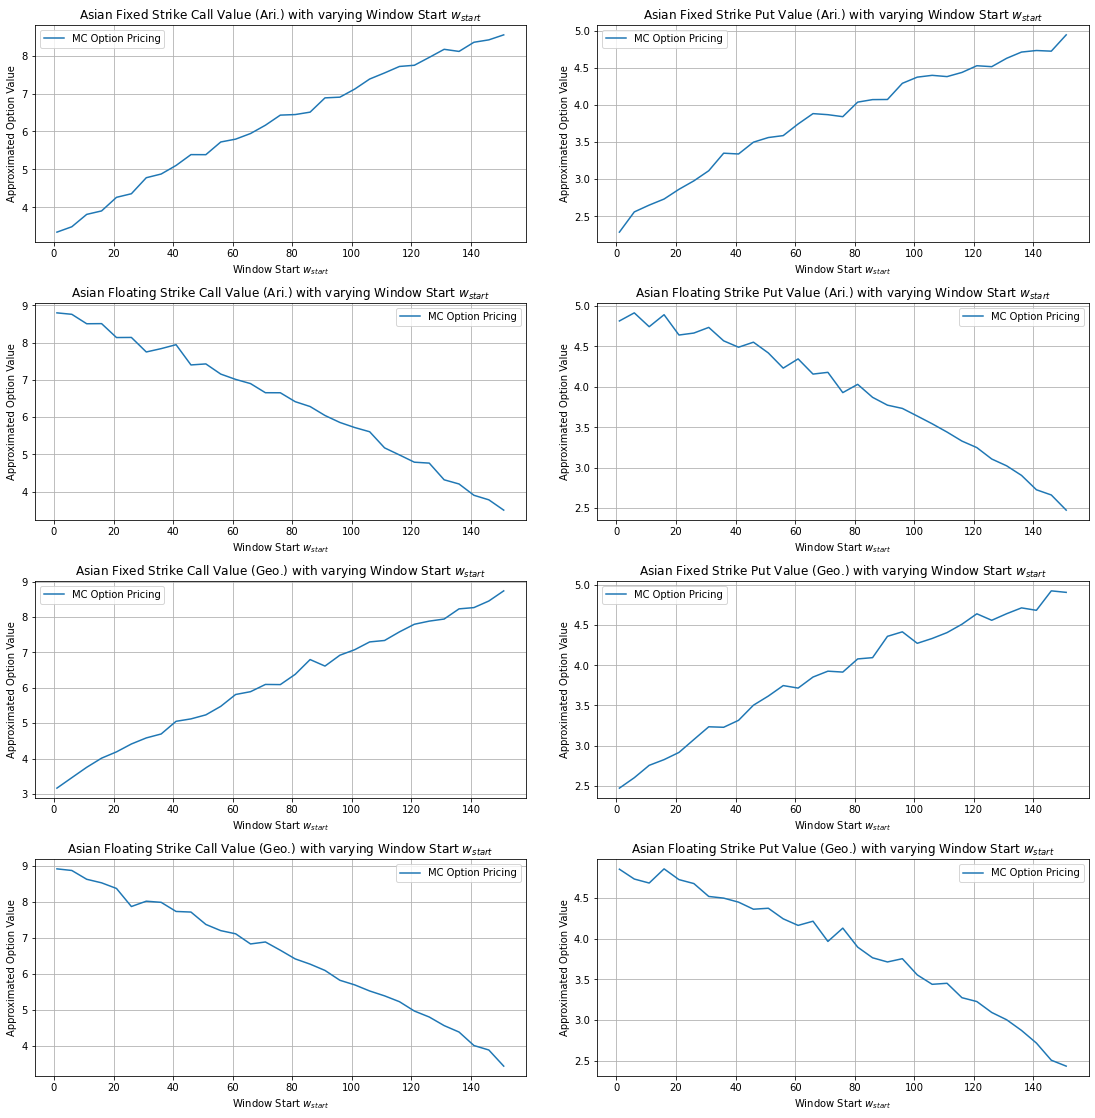

In [25]:
# parameters
S0 = 100
T = 1
E = 100
sigma = 0.2
time_steps = 252
num_realisations = 10000
B_low = 100
B_up = 150
r = 0.05
wsize = 100
wstart_range = np.arange(1, 153, 5)

# lists to store results
asian_fixed_strike_calls_vary_wstart  = []
asian_fixed_strike_puts_vary_wstart  = []
asian_floating_strike_calls_vary_wstart  = []
asian_floating_strike_puts_vary_wstart  = []
asian_fixed_strike_geo_calls_vary_wstart  = []
asian_fixed_strike_geo_puts_vary_wstart  = []
asian_floating_strike_geo_calls_vary_wstart  = []
asian_floating_strike_geo_puts_vary_wstart  = []

# simulations
# Asian options (Arithmetic)
for wstart in wstart_range:
    payoff_func = partial(asian_fixed_strike_call_payoff, E = E, w_size = wsize, w_start = wstart)
    asian_fixed_strike_calls_vary_wstart.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

for wstart in wstart_range:
    payoff_func = partial(asian_fixed_strike_put_payoff, E = E, w_size = wsize, w_start = wstart)
    asian_fixed_strike_puts_vary_wstart.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
for wstart in wstart_range:
    payoff_func = partial(asian_floating_strike_call_payoff, w_size = wsize, w_start = wstart)
    asian_floating_strike_calls_vary_wstart.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
for wstart in wstart_range:
    payoff_func = partial(asian_floating_strike_put_payoff, w_size = wsize, w_start = wstart)
    asian_floating_strike_puts_vary_wstart.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Asian options (Geometic)
for wstart in wstart_range:
    payoff_func = partial(asian_fixed_strike_geo_call_payoff, E = E, w_size = wsize, w_start = wstart)
    asian_fixed_strike_geo_calls_vary_wstart.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

for wstart in wstart_range:
    payoff_func = partial(asian_fixed_strike_geo_put_payoff, E = E, w_size = wsize, w_start = wstart)
    asian_fixed_strike_geo_puts_vary_wstart.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
for wstart in wstart_range:
    payoff_func = partial(asian_floating_strike_geo_call_payoff, w_size = wsize, w_start = wstart)
    asian_floating_strike_geo_calls_vary_wstart.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
for wstart in wstart_range:
    payoff_func = partial(asian_floating_strike_geo_put_payoff, w_size = wsize, w_start = wstart)
    asian_floating_strike_geo_puts_vary_wstart.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Supershare option are not affected by window starting point

    
# plots
fig, ax = plt.subplots(4, 2, figsize = (5*1.618*2, 4*4))
fig.tight_layout(pad = 4)

ax[0, 0].plot(wstart_range, asian_fixed_strike_calls_vary_wstart, label = 'MC Option Pricing')
ax[0, 0].set_title('Asian Fixed Strike Call Value (Ari.) with varying Window Start $w_{start}$')
ax[0, 0].set_xlabel('Window Start $w_{start}$')
ax[0, 0].set_ylabel('Approximated Option Value')
ax[0, 0].legend()
ax[0, 0].grid()

ax[0, 1].plot(wstart_range, asian_fixed_strike_puts_vary_wstart, label = 'MC Option Pricing')
ax[0, 1].set_title('Asian Fixed Strike Put Value (Ari.) with varying Window Start $w_{start}$')
ax[0, 1].set_xlabel('Window Start $w_{start}$')
ax[0, 1].set_ylabel('Approximated Option Value')
ax[0, 1].legend()
ax[0, 1].grid()

ax[1, 0].plot(wstart_range, asian_floating_strike_calls_vary_wstart, label = 'MC Option Pricing')
ax[1, 0].set_title('Asian Floating Strike Call Value (Ari.) with varying Window Start $w_{start}$')
ax[1, 0].set_xlabel('Window Start $w_{start}$')
ax[1, 0].set_ylabel('Approximated Option Value')
ax[1, 0].legend()
ax[1, 0].grid()

ax[1, 1].plot(wstart_range, asian_floating_strike_puts_vary_wstart, label = 'MC Option Pricing')
ax[1, 1].set_title('Asian Floating Strike Put Value (Ari.) with varying Window Start $w_{start}$')
ax[1, 1].set_xlabel('Window Start $w_{start}$')
ax[1, 1].set_ylabel('Approximated Option Value')
ax[1, 1].legend()
ax[1, 1].grid()

ax[2, 0].plot(wstart_range, asian_fixed_strike_geo_calls_vary_wstart, label = 'MC Option Pricing')
ax[2, 0].set_title('Asian Fixed Strike Call Value (Geo.) with varying Window Start $w_{start}$')
ax[2, 0].set_xlabel('Window Start $w_{start}$')
ax[2, 0].set_ylabel('Approximated Option Value')
ax[2, 0].legend()
ax[2, 0].grid()

ax[2, 1].plot(wstart_range, asian_fixed_strike_geo_puts_vary_wstart, label = 'MC Option Pricing')
ax[2, 1].set_title('Asian Fixed Strike Put Value (Geo.) with varying Window Start $w_{start}$')
ax[2, 1].set_xlabel('Window Start $w_{start}$')
ax[2, 1].set_ylabel('Approximated Option Value')
ax[2, 1].legend()
ax[2, 1].grid()

ax[3, 0].plot(wstart_range, asian_floating_strike_geo_calls_vary_wstart, label = 'MC Option Pricing')
ax[3, 0].set_title('Asian Floating Strike Call Value (Geo.) with varying Window Start $w_{start}$')
ax[3, 0].set_xlabel('Window Start $w_{start}$')
ax[3, 0].set_ylabel('Approximated Option Value')
ax[3, 0].legend()
ax[3, 0].grid()

ax[3, 1].plot(wstart_range, asian_floating_strike_geo_puts_vary_wstart, label = 'MC Option Pricing')
ax[3, 1].set_title('Asian Floating Strike Put Value (Geo.) with varying Window Start $w_{start}$')
ax[3, 1].set_xlabel('Window Start $w_{start}$')
ax[3, 1].set_ylabel('Approximated Option Value')
ax[3, 1].legend()
ax[3, 1].grid()

The results are again seperated by Asian fixed and floating options, when the window starts later:
- Asian fixed options increase in values
- Asian floating options decrease in values
  
The interpretation is again due to the price range of the payoff:
- For Asian fixed options, for a same fixed size window, if the average is calculated at the end, the average value range of it would be larger compared to an average calculated at the beginning, as we allowed more time for randomness on the stochastic underlying. As mentioned in the volatility section, a flatter/wider payoff/price range would increase the option value
- For Asian floating options, following similar logic, if the average is calculated at the end, it is likely the final $S_T$ would deviate less from the average, compared to if the average is calculated at the beginning. Therefore, the difference between the average and the strike is smaller, and hence a lower option value

<a id='Varying_Number_of_Realisations'></a>
***
### Varying Number of Realisations $N$
We vary the number of realisation $N$ from 1 to 100000 (increasing by multiple of 10) while holding all parameters unchanged, to see how the accuracy of our option value approximation changes. We do this by simulating 100 samples for each $N$. Here we use Asian fixed call option and Supershare option as examples:

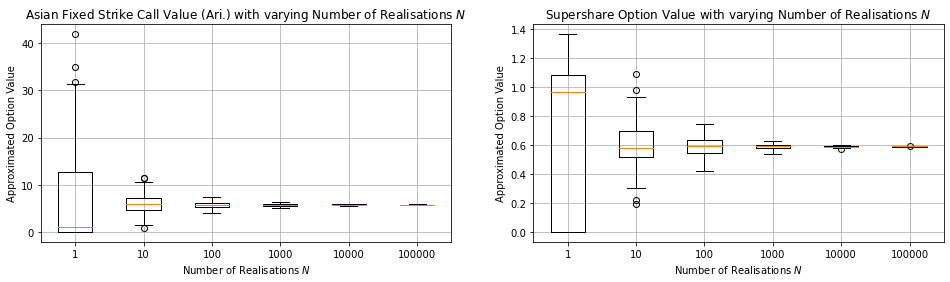

In [26]:
# parameters
S0 = 100
T = 1
E = 100
sigma = 0.2
time_steps = 252
r = 0.05
B_low = 100
B_up = 150

N_range = [1, 10, 100, 1000, 10000, 100000]
num_samples = 100

# dictionaries to store results
asian_fixed_strike_calls_vary_N  = {i: [] for i in N_range}
supershares_vary_N  = {i: [] for i in N_range}

# simulations
# Asian fixed strike call option
payoff_func = partial(asian_fixed_strike_call_payoff, E = E)
for num_realisations in N_range:
    for i in range(num_samples):
        asian_fixed_strike_calls_vary_N[num_realisations].append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

# Supershare option
payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)
for num_realisations in N_range:
    for i in range(num_samples):
        supershares_vary_N[num_realisations].append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
# plots
fig, ax = plt.subplots(1, 2, figsize = (5*1.618*2, 4))

ax[0].boxplot(asian_fixed_strike_calls_vary_N.values(), labels=N_range)
ax[0].set_title('Asian Fixed Strike Call Value (Ari.) with varying Number of Realisations $N$')
ax[0].set_xlabel('Number of Realisations $N$')
ax[0].set_ylabel('Approximated Option Value')
ax[0].grid()

ax[1].boxplot(supershares_vary_N.values(), labels=N_range)
ax[1].set_title('Supershare Option Value with varying Number of Realisations $N$')
ax[1].set_xlabel('Number of Realisations $N$')
ax[1].set_ylabel('Approximated Option Value')
ax[1].grid()

From the boxplots, we can see that the deviation/inter-quartile range/variance becomes smaller and smaller when we increase the number of realisations. This convergence to a price is very understandable, as more simulations we do, their average should be more accurate since we are less affected by the randomness. Similar results would have been achieved for other Asian options. We will dive deeper into the accuracy / error of the Monte Carlo scheme in the next section.

<a id='Further_Discussions'></a>
***
***
***
## Further Discussions
Below are some interesting problems/extensions that arouse from the above work.

***

<a id='Error_of_Monte_Carlo_Scheme'></a>
### Error of Monte Carlo Scheme
Continuing on the section of "Varying Number of Realisations $N$", we now look at the mathematical side concerning the error of Monte Carlo methods.

Assuming the variance of one realisation is $\sigma^2$, the mean of $n$ realisations will have a variance of:

\begin{align}
Var(\textrm{Mean of } n \textrm{ Realisations}) &= Var(\frac{1}{n} \sum_{i=1}^n \textrm{Realisation}_i) \\
&= \frac{1}{n^2}Var(\sum_{i=1}^n \textrm{Realisation}_i) \\
&= \frac{1}{n^2}\sum_{i=1}^n Var(\textrm{Realisation}_i),  \hspace{10mm} \textrm{since the realisations are independent} \\
&= \frac{1}{n^2} (n\sigma^2) \\
&= \frac{\sigma^2}{n}
\end{align}

Hence, the error of our approximation would be $\frac{\sigma}{\sqrt{N}}$, where $N$ is the number of realisations.  

Indeed, we can verify this with our simulations on the Asian fixed call options and supershare options. Here, we plot their theoretical variance according to the Monte Carlo scheme against their actual variance across different number of realisations. (Assuming the variance with 1 realisation is our $\sigma^2$).

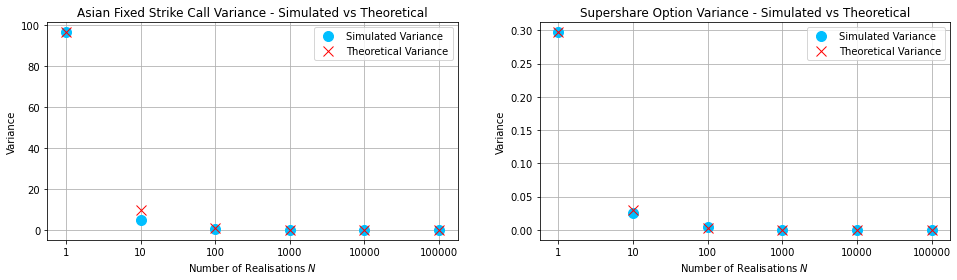

In [27]:
# actual variance of our simulations
simulated_var_asian_fixed = [np.var(x) for x in asian_fixed_strike_calls_vary_N.values()]
simulated_var_supershare = [np.var(x) for x in supershares_vary_N.values()]
# assume this variance with 1 realisation is our sigma^2
var_asian_fixed = simulated_var_asian_fixed[0]
var_supershare = simulated_var_supershare[0]
# theoretical variance according to Monte Carlo scheme
theoretical_var_asian_fixed = var_asian_fixed/N_range
theoretical_var_supershare = var_supershare/N_range

# plots
fig, ax = plt.subplots(1, 2, figsize = (5*1.618*2, 4))

ax[0].plot([str(x) for x in N_range], simulated_var_asian_fixed, label = 'Simulated Variance', marker = 'o', linestyle = '', color = 'deepskyblue', markersize = 10)
ax[0].plot(theoretical_var_asian_fixed, label = 'Theoretical Variance', marker = 'x', linestyle = '', color = 'r', markersize = 10)
ax[0].set_title('Asian Fixed Strike Call Variance - Simulated vs Theoretical')
ax[0].set_xlabel('Number of Realisations $N$')
ax[0].set_ylabel('Variance')
ax[0].legend()
ax[0].grid()

ax[1].plot([str(x) for x in N_range], simulated_var_supershare, label = 'Simulated Variance', marker = 'o', linestyle = '', color = 'deepskyblue', markersize = 10)
ax[1].plot(theoretical_var_supershare, label = 'Theoretical Variance', marker = 'x', linestyle = '', color = 'r', markersize = 10)
ax[1].set_title('Supershare Option Variance - Simulated vs Theoretical')
ax[1].set_xlabel('Number of Realisations $N$')
ax[1].set_ylabel('Variance')
ax[1].legend()
ax[1].grid()

We can see that the actual simulated and theoretical variance are pretty much in line with each other.

<a id='Time-stepping_Algorithm_for_Supershare_Option'></a>
***
### Time-stepping Algorithm for Supershare Option
Since the payoff of Supershare options only depend on the final $S_T$ (i.e. it is path independent), we can simulate only the last price $S_T$ with one great time step $T$ instead of doing simulations for all time steps.
- The risk-neutral stochastic differential equation for $S$ is
$$
dS = rSdt + \sigma S dX,
$$
- By Itô's lemma, the stochastic differential equations for $log(S)$ is
$$
d(log S) = (r-\frac{1}{2} \sigma^2) dt + \sigma dX,
$$
- Integrating both sides between 0 and T give
$$
log(\frac{S_T}{S_0}) = (r-\frac{1}{2} \sigma^2)T + \sigma (X_t - X_0)
$$
- Hence,
$$
S_T = S_0 e^{(r-\frac{1}{2} \sigma^2)T + \sigma \phi \sqrt{T}}
$$
  
and we can replace the random walk simulation `rn_random_walk()` with `final_price_simulation()`.

In [28]:
def final_price_simulation(S0:float, T:float, sigma:float, r:float, num_realisations:int):
    phi = np.random.normal(size = (1, num_realisations))
    # simulating the final price directly
    simulated_price = S0*np.exp((r - 0.5 * (sigma**2))*T + sigma*phi*np.sqrt(T))
    return simulated_price

The time stepping algorithm then becomes:

In [29]:
def option_pricing_TS(S0, T, sigma, r, time_steps, num_realisations, payoff_func):
    # Step 1
    price_paths = final_price_simulation(S0, T, sigma, r, num_realisations)
    # Step 2
    payoffs = realisation_payoff(payoff_func, price_paths)
    # Step 3 & 4
    option_value = average_and_discount(payoffs, T, r)
    
    return option_value

We test the runtime of Euler–Maruyama method and time stepping algorithm by running 1000 iterations of supershare option pricing below

In [30]:
# parameters
num_pricing = 1000
S0 = 100
T = 1
E = 100
r = 0.05
sigma = 0.2
time_steps = 252
num_realisations = 1000
B_low = 100
B_up = 150

payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)

For Euler–Maruyama method:

In [31]:
%%time
# recording the time needed to simulate 1000 approximations each with 1000 realisation
supershares_time_MC = []
for i in range(num_pricing):
    supershares_time_MC.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

Wall time: 13.5 s


For time-stepping algorithm:

In [32]:
%%time
# recording the time needed to simulate 1000 approximations each with 1000 realisation
supershares_time_TS = []
for i in range(num_pricing):
    supershares_time_TS.append(option_pricing_TS(S0, T, sigma, r, time_steps, num_realisations, payoff_func))

Wall time: 2.1 s


Using the same parameters, we can see the the time stepping algorithm is much faster than the original Euler-Maruyana method. Below we also plot the histogram of simulated supershare prices to ensure that they generate similar results.

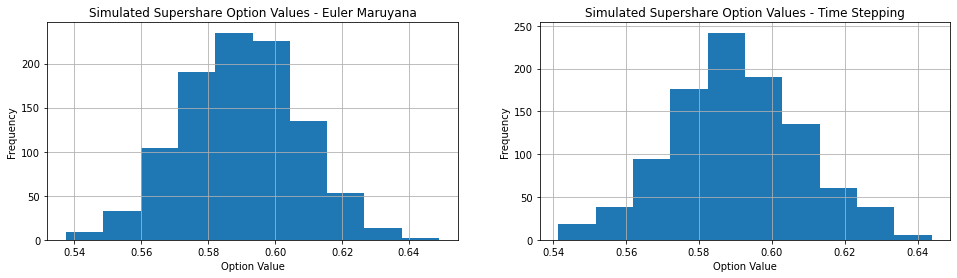

In [33]:
fig, ax = plt.subplots(1,2, figsize = (5*1.618*2, 4))

ax[0].hist(supershares_time_MC)
ax[0].set_title('Simulated Supershare Option Values - Euler Maruyana')
ax[0].set_xlabel('Option Value')
ax[0].set_ylabel('Frequency')
ax[0].grid()

ax[1].hist(supershares_time_TS)
ax[1].set_title('Simulated Supershare Option Values - Time Stepping')
ax[1].set_xlabel('Option Value')
ax[1].set_ylabel('Frequency')
ax[1].grid()

<a id='Monte_Carlo_Pricing_with_Exact_Solution'></a>
***
### Monte Carlo Pricing with Exact Solution
From the time-stepping algorithm, we see that we can actually use the exact solution to simulate the price paths instead of using the Euler-Maruyama method. The exact solution for the underlying stock price for one time step from $t$ could be derived from the risk-neutral stochastic differential equation for $S$:

$$
dS = rSdt + \sigma S dX,
$$
Itô's lemma gives
$$
d(log S) = (r-\frac{1}{2} \sigma^2) dt + \sigma dX,
$$
Integrating both sides between $t$ and $t + \delta t$ gives
$$
log(\frac{S_{t + \delta t}}{S_t}) = (r-\frac{1}{2} \sigma^2)\delta t + \sigma (X_{t + \delta t} - X_t)
$$
Hence, 
$$
S_{t + \delta t} = S_t e^{(r-\frac{1}{2} \sigma^2)(\delta t) + \sigma \phi \sqrt{\delta t}}
$$


Therefore, if we move one time step from time 0,
\begin{align}
S_1 &= S_0 e^{((r-\frac{1}{2} \sigma^2)(\delta t) + \sigma \phi_1 \sqrt{\delta t})} \\
\end{align}

From $S_1$, we can obtain $S_2$ as:
\begin{align}
S_2 &= S_1 e^{((r-\frac{1}{2} \sigma^2)(\delta t) + \sigma \phi_2 \sqrt{\delta t})} \\
&= S_0 e^{((r-\frac{1}{2} \sigma^2)(\delta t) + \sigma \phi_1 \sqrt{\delta t})} e^{((r-\frac{1}{2} \sigma^2)(\delta t) + \sigma \phi_2 \sqrt{\delta t})} \\
&= S_0 e^{\sum_{i=1}^2((r-\frac{1}{2} \sigma^2)(\delta t) +  \sigma \phi_i \sqrt{\delta t})}
\end{align}

Hence, we can deduce the exact solution for a price path:
$$
S_t = S_0 e^{\sum_{i=1}^t((r-\frac{1}{2} \sigma^2)(\delta t) +  \sigma \phi_i \sqrt{\delta t})}
$$

and we can replace the random walk simulation `rn_random_walk()` with `exact_random_walk()`.

In [34]:
def exact_random_walk(S0:float, T:float, sigma:float, r:float, time_steps:int, num_realisations:int):
    delta_t = T / time_steps
    # each column represents a realisation
    phi = np.random.normal(size = (time_steps, num_realisations)) # default standard normal
    ret = (r - 0.5*sigma**2)*delta_t + sigma*phi*np.sqrt(delta_t)
    # add one row with 0 at the top, so the realisations can start at S_0
    ret_cumsum = np.concatenate((np.array([[0]*num_realisations]), np.cumsum(ret, axis = 0)), axis = 0)
    price_paths = S0*np.exp(ret_cumsum)
    return price_paths

The exact solution Monte Carlo algorithm is then:

In [35]:
def option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func):
    # Step 1
    price_paths = exact_random_walk(S0, T, sigma, r, time_steps, num_realisations)
    # Step 2
    payoffs = realisation_payoff(payoff_func, price_paths)
    # Step 3 & 4
    option_value = average_and_discount(payoffs, T, r)
    
    return option_value

Test it against Euler-Maruyama method by pricing 1000 times Asian Fixed Call Option and look at their distributions:

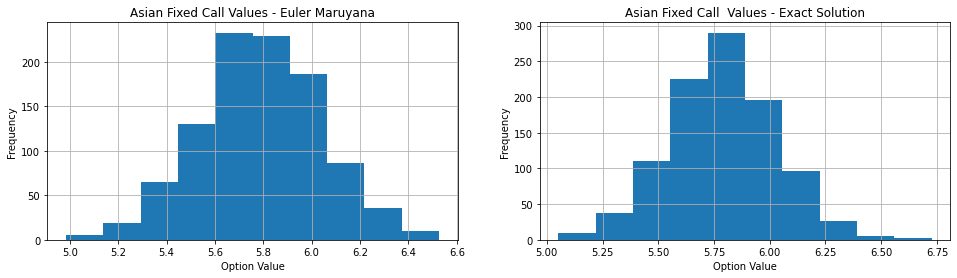

In [36]:
# parameters
num_pricing = 1000
S0 = 100
T = 1
E = 100
r = 0.05
sigma = 0.2
time_steps = 252
num_realisations = 1000

payoff_func = partial(asian_fixed_strike_call_payoff, E = E)

# list to store results
asian_fixed_call_euler = []
asian_fixed_call_exact = []

# simulations
for i in range(num_pricing):
    asian_fixed_call_euler.append(option_pricing_euler(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    asian_fixed_call_exact.append(option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func))
    
# plots
fig, ax = plt.subplots(1,2, figsize = (5*1.618*2, 4))

ax[0].hist(asian_fixed_call_euler)
ax[0].set_title('Asian Fixed Call Values - Euler Maruyana')
ax[0].set_xlabel('Option Value')
ax[0].set_ylabel('Frequency')
ax[0].grid()

ax[1].hist(asian_fixed_call_exact)
ax[1].set_title('Asian Fixed Call  Values - Exact Solution')
ax[1].set_xlabel('Option Value')
ax[1].set_ylabel('Frequency')
ax[1].grid()

Which is very similar to each other. There should be no huge difference between the Euler-maruyama method and generating the price path from the exact solution, only that the exact solution would be slightly more accurate.

Repricing all the exotics with the initial sample parameters:

In [37]:
# parameters
S0 = 100
E = 100
T = 1
sigma = 0.2
r = 0.05
time_steps = 252
num_realisations = 100000
B_low = 100
B_up = 150
# averaging window starts from 1 to end
# since window parameters are set default in the payoff functions, we don't need to specify here

# dictionary to store results
exact_results = {}

# Asian Fixed Strike Call Option (Arithmetic)
payoff_func = partial(asian_fixed_strike_call_payoff, E = E)
exact_results['Asian Fixed Call Option (Arithmetic)'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Put Option (Arithmetic)
payoff_func = partial(asian_fixed_strike_put_payoff, E = E)
exact_results['Asian Fixed Put Option (Arithmetic)'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Floating Strike Call Option (Arithmetic)
payoff_func = asian_floating_strike_call_payoff
exact_results['Asian Floating Call Option (Arithmetic)'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Put Option (Arithmetic)
payoff_func = asian_floating_strike_put_payoff
exact_results['Asian Floating Put Option (Arithmetic)'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Call Option (Geometric)
payoff_func = partial(asian_fixed_strike_geo_call_payoff, E = E)
exact_results['Asian Fixed Call Option (Geometric)'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Put Option (Geometric)
payoff_func = partial(asian_fixed_strike_geo_put_payoff, E = E)
exact_results['Asian Fixed Put Option (Geometric)'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Floating Strike Call Option (Geometric)
payoff_func = asian_floating_strike_geo_call_payoff
exact_results['Asian Floating Call Option (Geometric)'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Asian Fixed Strike Put Option (Geometric)
payoff_func = asian_floating_strike_geo_put_payoff
exact_results['Asian Floating Put Option (Geometric)'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)

# Supershare Option
payoff_func = partial(supershare_payoff, B_low = B_low, B_up = B_up)
exact_results['Supershare Option'] = option_pricing_exact(S0, T, sigma, r, time_steps, num_realisations, payoff_func)


# print results as a dataframe
compare_df = pd.DataFrame.from_dict([init_results, exact_results]).T
compare_df.columns = ['Euler Maruyama', 'Exact Solution']
compare_df

,Euler Maruyama,Exact Solution
Asian Fixed Call Option (Arithmetic),5.782991,5.761706
Asian Fixed Put Option (Arithmetic),3.358232,3.332218
Asian Floating Call Option (Arithmetic),5.824674,5.864961
Asian Floating Put Option (Arithmetic),3.389377,3.389705
Asian Fixed Call Option (Geometric),5.550229,5.549794
Asian Fixed Put Option (Geometric),3.428814,3.445554
Asian Floating Call Option (Geometric),6.022987,6.069235
Asian Floating Put Option (Geometric),3.290961,3.246614
Supershare Option,0.588398,0.592822


We can see that for all types of payoffs, the two methods still generate similar results.

<a id='Closed-form_Solutions'></a>
***
### Closed-form Solution
During our research, we found a closed-form solution for supershare option. Here we try to price with the closed-form solution:

#### Supershare Option
The closed-form solution (see E. G. Haug, *“The Complete Guide to Option Pricing Formulas”* p.176) for supershare option is given by :

$$
w = (S_0e^{-rT}/B_{low}) \times [N(d_1) - N(d_2)]
$$

where

$$
d_1 = \frac{ln(S_0/B_{low}) + (\sigma^2/2)T}{\sigma \sqrt{T}} \hspace{5mm} \textrm{and} \hspace{5mm} d_2 = \frac{ln(S_0/B_{up}) + (\sigma^2/2)T}{\sigma \sqrt{T}}
$$

Substituting the initial sample parameters into the pricing formula:

In [38]:
S0 = 100
T = 1
sigma = 0.2
r = 0.05
B_low = 100
B_up = 150

d1 = (np.log(S0/B_low) + ((sigma**2)/2)*T)/(sigma*np.sqrt(T))
d2 = (np.log(S0/B_up) + ((sigma**2)/2)*T)/(sigma*np.sqrt(T))

w = S0*np.exp(-r*T)/B_low*(stats.norm.cdf(d1) - stats.norm.cdf(d2))
print('The supershare option value is: %.6f' % w)

The supershare option value is: 0.487846


***
***
***

<a id='Conclusion2'></a>
## Conclusion
In this report we have covered the pricing of Asian options and supershare options with Monte Carlo simulations. We would like to summerise our findings with 3 main points - Monte Carlo methods, Asian options and supershare options:

<a id='Monte_Carlo_Methods'></a>
#### Monte Carlo Methods
The Monte Carlo Scheme was shown to be very useful when we cannot find the close-form solution for the option value. It can accommodate highly customised complex payoffs with simple programming. The accuracy is very high given that we can run a lot of simulations, as shown in the 'Error of Monte Carlo' session. However, the drawback is that the computational time is relatively long, even for 1000 realisations (which is quite little), running it for 1000 times by the Euler-maruyama method could take up to few minutes. There is a time-stepping algorithm which is much faster, but it is limited to mostly path-independent options. We also explored Monte Carlo pricing with exact solution assuming a lognormal random walk, which is slightly more accurate but requires more mathematical background.  

<a id='Asian_Options'></a>
#### Asian Options
There are few Asian option variations that we priced and tested the variables on in this report. As a conclusion, we group it into two major categories - Asian fixed options and Asian floating options.  

Asian fixed options are just like vanilla European options in our view, with the difference being $S_T$ substituted by an average value over a certain period at some sampling rate. As we can see from the tests of varing our parameters, Asian fixed option acted just like vanilla options, with at-the-money call option values favoured by lower strike, higher volatility, higher rates and longer time to expiry. It is a cheaper and more stable version of vanilla European options, as averaging lowers the volatility of the contract.  

Asian floating options are also similar to vanilla European options, but in a different way. Since here the strike is an average value of some kind, we can see it as a 'delayed' and 'shorter' version of vanilla options. In the middle of the price path, the floating strike is actually half determined, from here it looks more and more just like a vanilla option, with $S_T$ determining the payoff and the floating strike not moving as much (as being weighted by the previous half). The closer the Asian floating option is to expiry, the more it acts like a vanilla European option, as the strike become more and more stable after averaging more data. Since it is a 'delayed' (being discounted more) and 'shorter' (less time value) version, it is cheaper than a vanilla option, and also react like one, favoured by lower strike, higher volatility, higher rates and longer time to expiry.


<a id='Supershare_Option'></a>
#### Supershare Option
Supershare option is similar to a binary option, and is mostly characterised by the upper and lower boundaries. Like having knock-in and knock-outs, the first goal for a good payoff would be to stay within bound, therefore anything that is too extreme, like high volatility, very low or very high rates, and long time horizon are not good for supershare option value. If the bounds are wider, relative to other parameters, it will act more like a call option, benefiting from a lower lower boundary (we can think of it as the strike), slightly higher volatility, higher rates and an appropriate longer time to expiry.

***
***
***

<a id='References2'></a>
## References
E. G. Haug, *“The Complete Guide to Option Pricing Formulas”*, McGraw-Hill, New York, 2007.